## GROUP 4: TIME SERIES MODELING

Members

*  Ann Gitonga
*  Mitchelle Okubasu
*  Pascal Okuda

Student Pace:
* Part-time


Instructors:
* Samwel Jane
* Stella Waithera
* Everlyn Asiko





# ⏳Time Series Analysis:

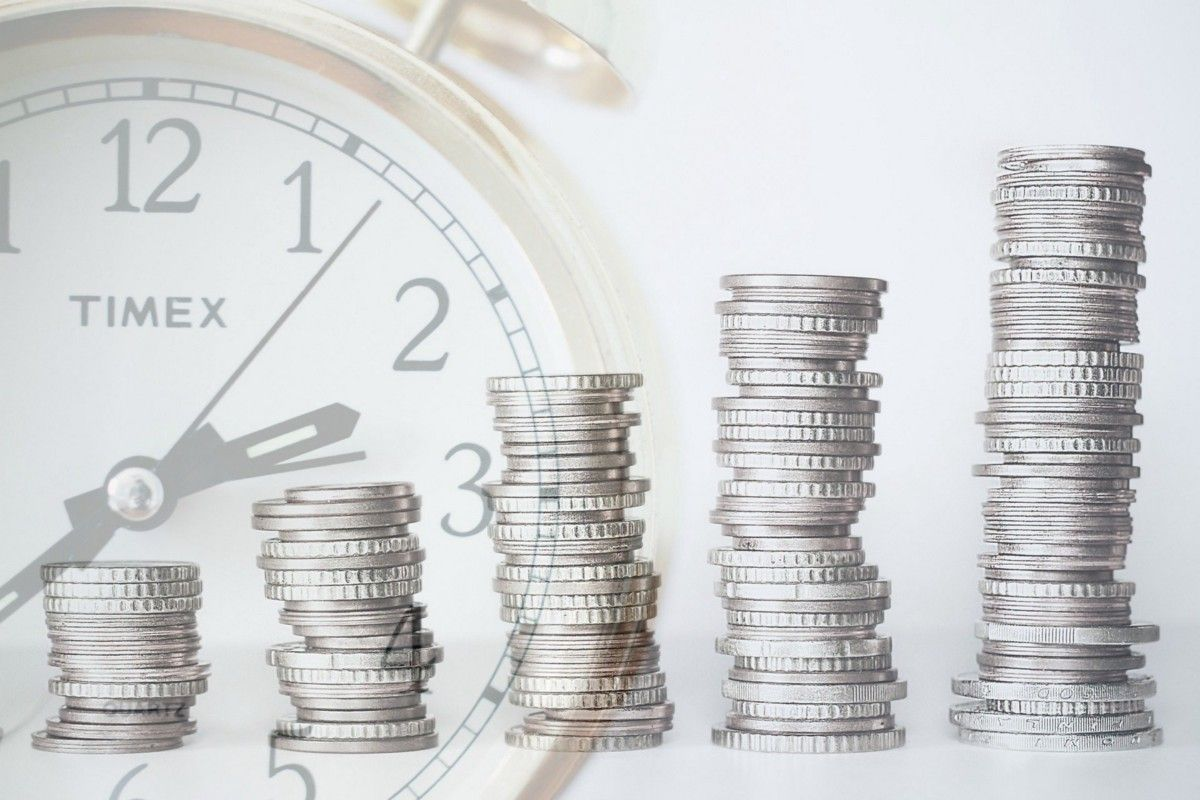

Time series analysis is a statistical technique used to analyze and model data points collected over time.
Time series analysis is extremely useful to observe how a given asset, security, or economic variable behaves/changes over time.
In this project we will use time series analysis on real estate data to forecast the top 5 cities for Talanta Ltd.


## 🏰Understanding Real Estate:

Real estate is considered real property that includes land and anything permanently attached to it or built on it, whether natural or man-made.
There are five main categories of real estate which include residential, commercial, industrial, raw land, and special use.
Investing in real estate includes purchasing a home, rental property, or land.
Indirect investment in real estate can be made via REITs or through pooled real estate investment.
Residential real estate: Any property used for residential purposes. Examples include single-family homes, condos, cooperatives, duplexes, townhouses, and multifamily residences.

Commercial real estate: Any property used exclusively for business purposes, such as apartment complexes, gas stations, grocery stores, hospitals, hotels, offices, parking facilities, restaurants, shopping centers, stores, and theaters.

Industrial real estate: Any property used for manufacturing, production, distribution, storage, and research and development.

Land: Includes undeveloped property, vacant land, and agricultural lands such as farms, orchards, ranches, and timberland.

Special purpose: Property used by the public, such as cemeteries, government buildings, libraries, parks, places of worship, and schools.
The earnings from investment in real estate are garnered from revenue from rent or leases, and appreciation of the real estate's value. According to ATTOM, which oversees the nation's premier property database, the year-end 2021 U.S. home sales report shows that home sellers nationwide realized a profit of $94,092, a 45.3%return on investment, up 45% from $64,931 in 2020, and up 71% from $55,000 two years ago.

Real estate is also dramatically affected by its location and factors such as employment rates, the local economy, crime rates, transportation facilities, school quality, municipal services, and property taxes can affect the value of the real estate.


### Factors to consider before investing in real estate


*   Location
*   Market growth
*   Property demand
*   Developmnent and Regeneration
*   Future Potential



In this project our main focus will be on Location as we are considering zipcodes.

# Problem statement:

What are the top 5 best zip codes to invest in?

# Business Problem
We are an independent real consultancy firm and our client, Talanta  real-estate firm is looking to invest in the best zipcodes.We have been tasked to create a time-series model that can be used to forecast the avarage house prices for various zipcodes in the US. Our task is to come up with top 5 best zip codes to invest in.

# Business Understanding
Talanta Ltd is a real estate firm that helps home buyers find and buy a new home or commercial space. They help them buy and sell homes and guide clients through negotiation processes to get top dollar for their property when selling. They also make sure that it is adequately marketed so potential buyers can find them. Some of their responsibilities include:

*   To provide guidance and assistance to sellers and buyers in marketing and purchasing property for the right price under the best terms.
*   To determine clients’ needs and financial abilities to propose solutions that suit them.
*   To perform comparative market analysis to estimate properties’ value


# Objectives:📈


*   To conduct a time series analysis on Zillow Research data
*   To develop a time series model that would predict the top 5 zip codes to invest in.

*   To come up with recommendations for the top 5 zip codes for Talanta Ltd


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [154]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pandas.tseries

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import warnings
plt.rcParams.update({'figure.figsize':(10, 10), 'figure.dpi':120})


In [155]:
#load the data

data = pd.read_csv('zillow_data.csv')

In [156]:
data.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [158]:
data.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [159]:
data.shape

(14723, 272)

### Return On Investment(ROI)

Return on investment (ROI) is an approximate measure of an investment's profitability. ROI is calculated by subtracting the initial cost of the investment from its final value, then dividing this new number by the cost of the investment, and finally, multiplying it by 100.
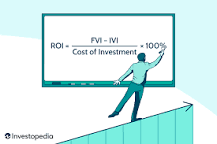

In [160]:
# calculating ROI and %ROI


#def calculate_roi(dataframe, initial_investment_col, final_value_col):
"""
    Calculates the Return on Investment (ROI) for time series data in wide format.

    Parameters:
    dataframe (pd.DataFrame): The input dataframe with time series data.
    initial_investment_col (str): The name of the column containing the initial investment values.
    final_value_col (str): The name of the column containing the final value for each investment.

    Returns:
    pd.Series: A series containing the ROI values for each investment.
    """
#    initial_investment = dataframe['1996-04	']
 #   final_value = dataframe['2018-04']

 #   roi = (final_value - initial_investment) / initial_investment * 100
  #  return roi




#roi_values = calculate_roi(df, 'Investment_A', 'Final_Value_A')
#print(roi_values)


'\n    Calculates the Return on Investment (ROI) for time series data in wide format.\n\n    Parameters:\n    dataframe (pd.DataFrame): The input dataframe with time series data.\n    initial_investment_col (str): The name of the column containing the initial investment values.\n    final_value_col (str): The name of the column containing the final value for each investment.\n\n    Returns:\n    pd.Series: A series containing the ROI values for each investment.\n    '

# Step 2: Reshape from Wide to Long Format

It is difficult to work with the data while in the wide format. We transform the data to long format.

In [161]:
# Function to melt data

def melt_data(df):

    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName',
                                  'SizeRank'], var_name='date', value_name='value')
    melted['date'] = pd.to_datetime(melted['date'], format='%Y-%m')
    melted = melted.dropna(subset=['value'])
    return melted

In [162]:
df1 = melt_data(data)
df1.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank       date     value  
0         1 1996-04-01  334200.0  
1         2 1996-04-01  235700.0  
2         3 1996-04-01  210400.0  
3         4 1996-04-01  498100.0  
4         5 1996-04-01   77300.0

In [163]:
# Set datetime index with Pandas

def datetimeindex(df1,col_index = 'date',drop=False,verbose=True):
    df1[col_index] = pd.to_datetime(df1[col_index],errors='coerce')
    df1 = df1.set_index('date',drop=drop)
    if verbose:
        display(df1.index)
    return df1

In [164]:
df1 = datetimeindex(df1)

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=3744704, freq=None)

In [165]:
# drop the date
df1_updated = df1.drop('date',axis = 1)
df1_updated

RegionID  RegionName                 City State  \
date                                                          
1996-04-01     84654       60657              Chicago    IL   
1996-04-01     90668       75070             McKinney    TX   
1996-04-01     91982       77494                 Katy    TX   
1996-04-01     84616       60614              Chicago    IL   
1996-04-01     93144       79936              El Paso    TX   
...              ...         ...                  ...   ...   
2018-04-01     58333        1338             Ashfield    MA   
2018-04-01     59107        3293            Woodstock    NH   
2018-04-01     75672       40404                Berea    KY   
2018-04-01     93733       81225  Mount Crested Butte    CO   
2018-04-01     95851       89155             Mesquite    NV   

                        Metro CountyName  SizeRank     value  
date                                                          
1996-04-01            Chicago       Cook         1  334200.0  
1996-04-01  Dallas-Fort Worth     Collin         2  235700.0  
1996-04-01            Houston     Harris         3  210400.0  
1996-04-01            Chicago       Cook         4  498100.0  
1996-04-01            El Paso    El Paso         5   77300.0  
...                       ...        ...       ...       ...  
2018-04-01    Greenfield Town   Franklin     14719  209300.0  
2018-04-01          Claremont    Grafton     14720  225800.0  
2018-04-01           Richmond    Madison     14721  133400.0  
2018-04-01                NaN   Gunnison     14722  664400.0  
2018-04-01          Las Vegas      Clark     14723  357200.0  

[3744704 rows x 8 columns]

In [166]:
# index - datetime
df1_updated.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=3744704, freq=None)

In [167]:
#rename the column RegionID to zipcodes
#df.rename(columns = {'RegionID': 'Zipcode'}, inplace=True)


In [168]:
df1_updated.isna().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
value              0
dtype: int64

In [169]:
# remove missing rows
df1_updated.dropna(inplace=True)
df1_updated.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
value         0
dtype: int64

In [170]:
df = df1_updated.groupby('RegionName').resample('MS').asfreq()
df

RegionID  RegionName       City State        Metro  \
RegionName date                                                             
1001       1996-04-01     58196        1001     Agawam    MA  Springfield   
           1996-05-01     58196        1001     Agawam    MA  Springfield   
           1996-06-01     58196        1001     Agawam    MA  Springfield   
           1996-07-01     58196        1001     Agawam    MA  Springfield   
           1996-08-01     58196        1001     Agawam    MA  Springfield   
...                         ...         ...        ...   ...          ...   
99901      2017-12-01    100478       99901  Ketchikan    AK    Ketchikan   
           2018-01-01    100478       99901  Ketchikan    AK    Ketchikan   
           2018-02-01    100478       99901  Ketchikan    AK    Ketchikan   
           2018-03-01    100478       99901  Ketchikan    AK    Ketchikan   
           2018-04-01    100478       99901  Ketchikan    AK    Ketchikan   

                              CountyName  SizeRank     value  
RegionName date                                               
1001       1996-04-01            Hampden      5851  113100.0  
           1996-05-01            Hampden      5851  112800.0  
           1996-06-01            Hampden      5851  112600.0  
           1996-07-01            Hampden      5851  112300.0  
           1996-08-01            Hampden      5851  112100.0  
...                                  ...       ...       ...  
99901      2017-12-01  Ketchikan Gateway      7294  291900.0  
           2018-01-01  Ketchikan Gateway      7294  294200.0  
           2018-02-01  Ketchikan Gateway      7294  297500.0  
           2018-03-01  Ketchikan Gateway      7294  302100.0  
           2018-04-01  Ketchikan Gateway      7294  305100.0  

[3508681 rows x 8 columns]

In [171]:
df.reset_index(inplace = True, level =0 , drop = True)
df.head()

RegionID  RegionName    City State        Metro CountyName  \
date                                                                     
1996-04-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-05-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-06-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-07-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-08-01     58196        1001  Agawam    MA  Springfield    Hampden   

            SizeRank     value  
date                            
1996-04-01      5851  113100.0  
1996-05-01      5851  112800.0  
1996-06-01      5851  112600.0  
1996-07-01      5851  112300.0  
1996-08-01      5851  112100.0

In [172]:
df.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=3508681, freq=None)

In [173]:
# Check for missing
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
value         0
dtype: int64

# Step 3: Data Preprocessing

In [174]:
#def get_datetimes(df):
  #  """

   # returns only those column names that can be converted into datetime objects
  #  as datetime objects.
   # NOTE number of returned columns may not match total number of columns in passed dataframe
   # """

   # return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [175]:
#get_datetimes(data)

In [176]:
#type(df)

# Step 4: EDA and Visualization

In [177]:
#font = {'family' : 'normal', 'weight' : 'bold','size'   : 22}

#plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [178]:
df.head()

RegionID  RegionName    City State        Metro CountyName  \
date                                                                     
1996-04-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-05-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-06-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-07-01     58196        1001  Agawam    MA  Springfield    Hampden   
1996-08-01     58196        1001  Agawam    MA  Springfield    Hampden   

            SizeRank     value  
date                            
1996-04-01      5851  113100.0  
1996-05-01      5851  112800.0  
1996-06-01      5851  112600.0  
1996-07-01      5851  112300.0  
1996-08-01      5851  112100.0

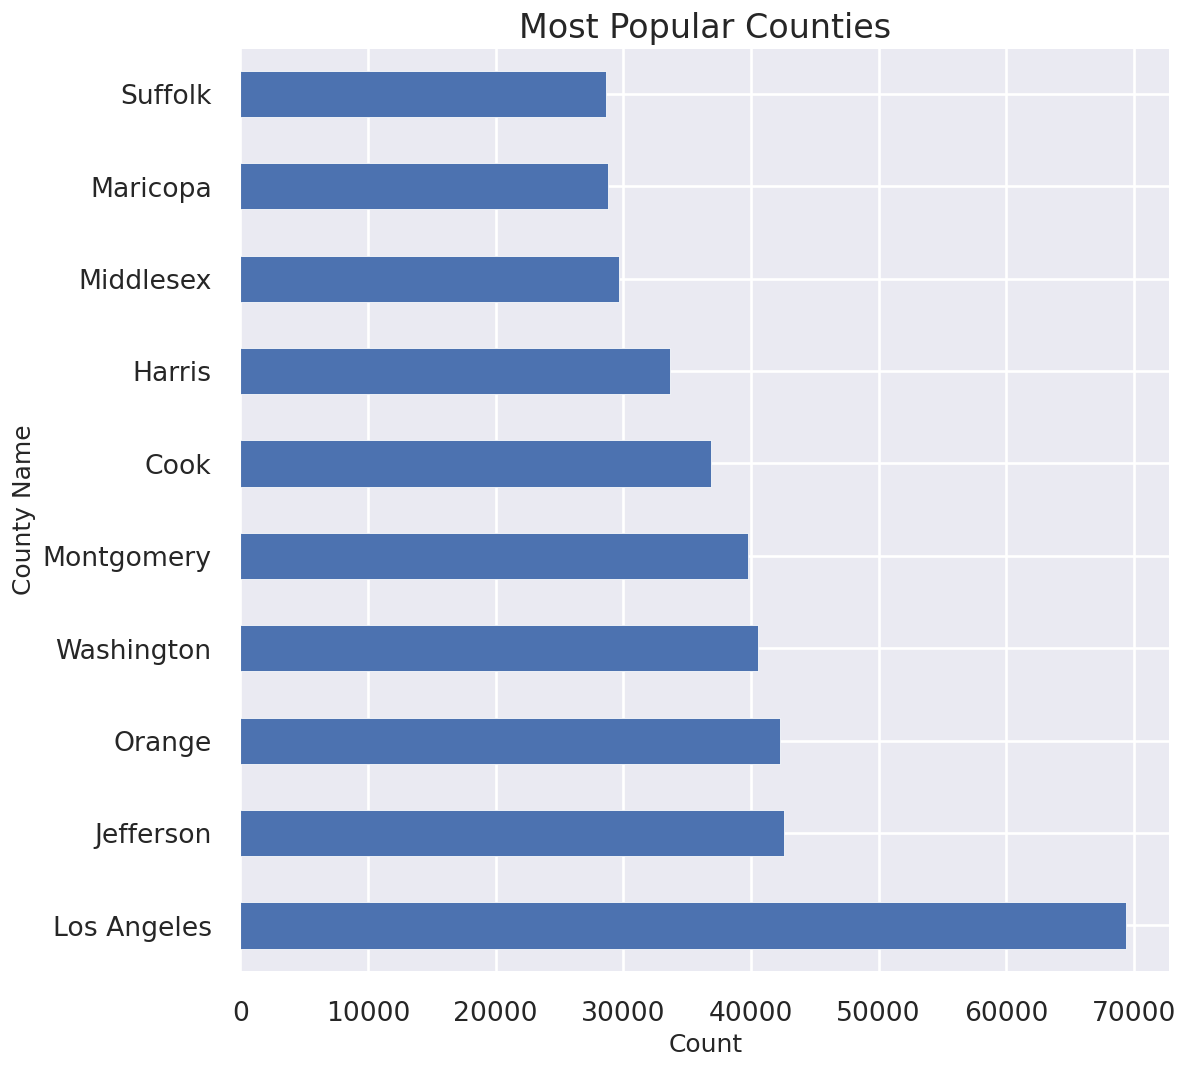

In [179]:
# plotting the top 10 most popular counties

df.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

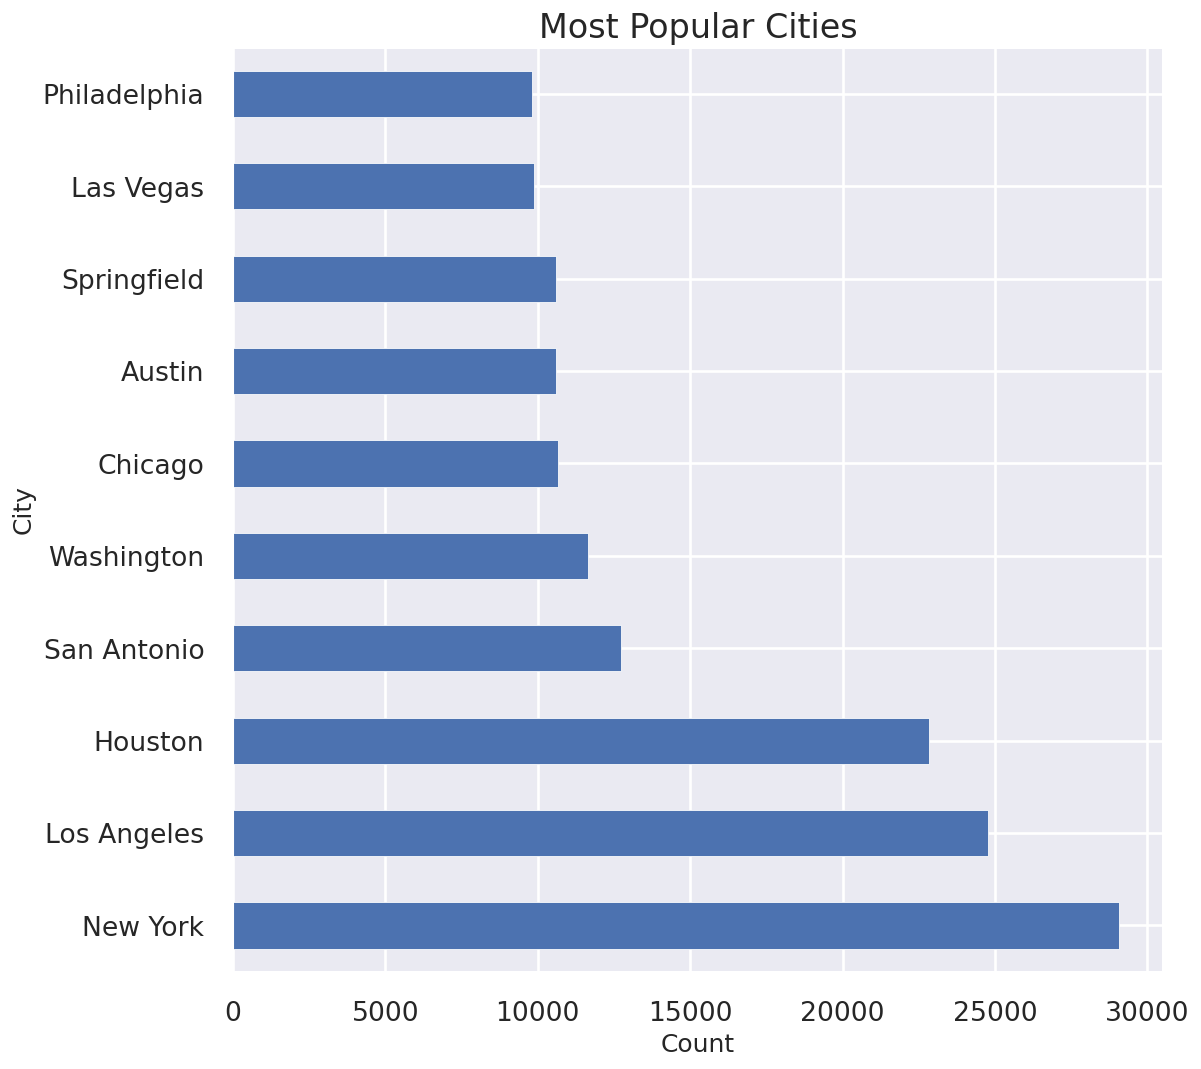

In [180]:
df.City.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("City",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

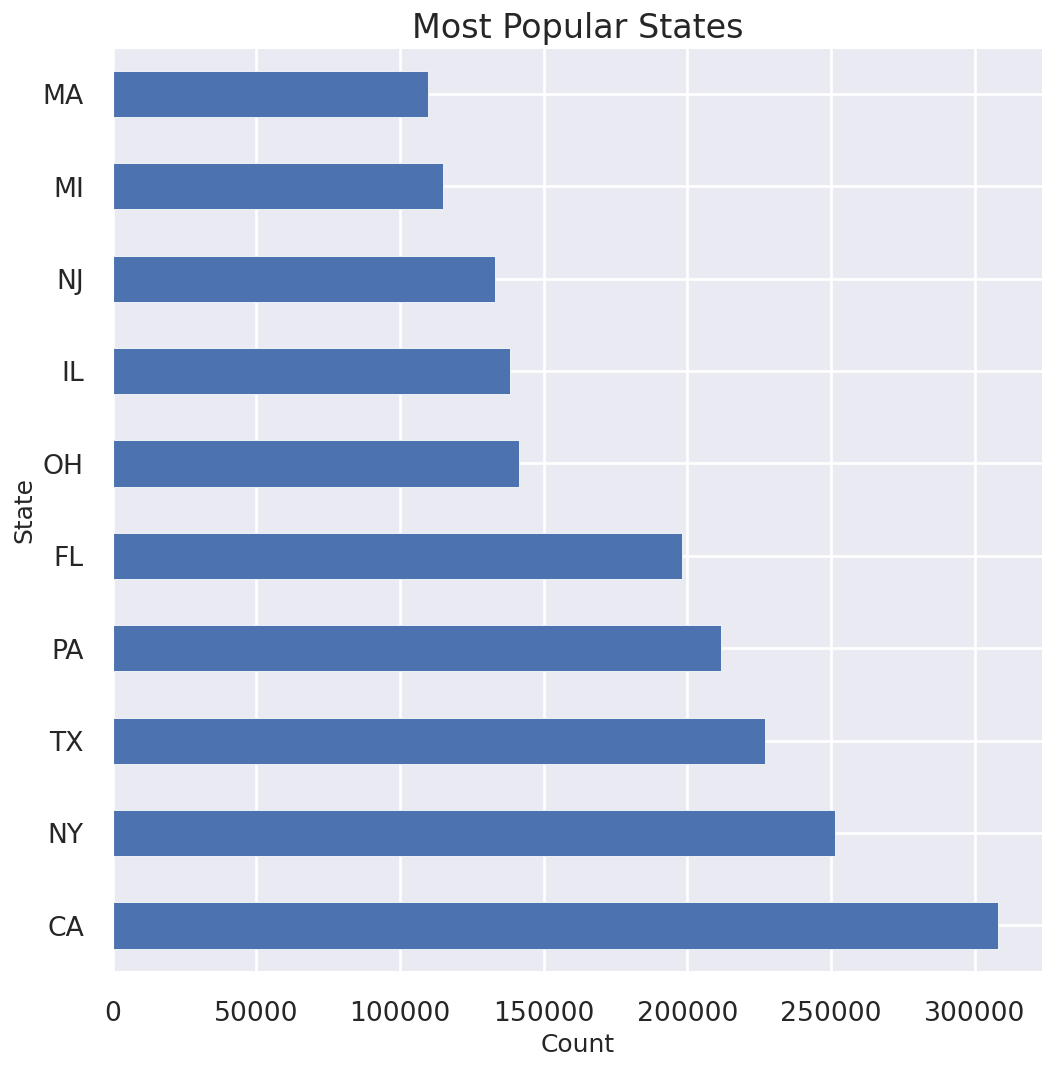

In [181]:
df.State.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("State",fontsize=15)
plt.title("Most Popular States",fontsize=20);

## **Average prices**

In [182]:
# Zip codes
zip_codes = list(df['RegionName'])

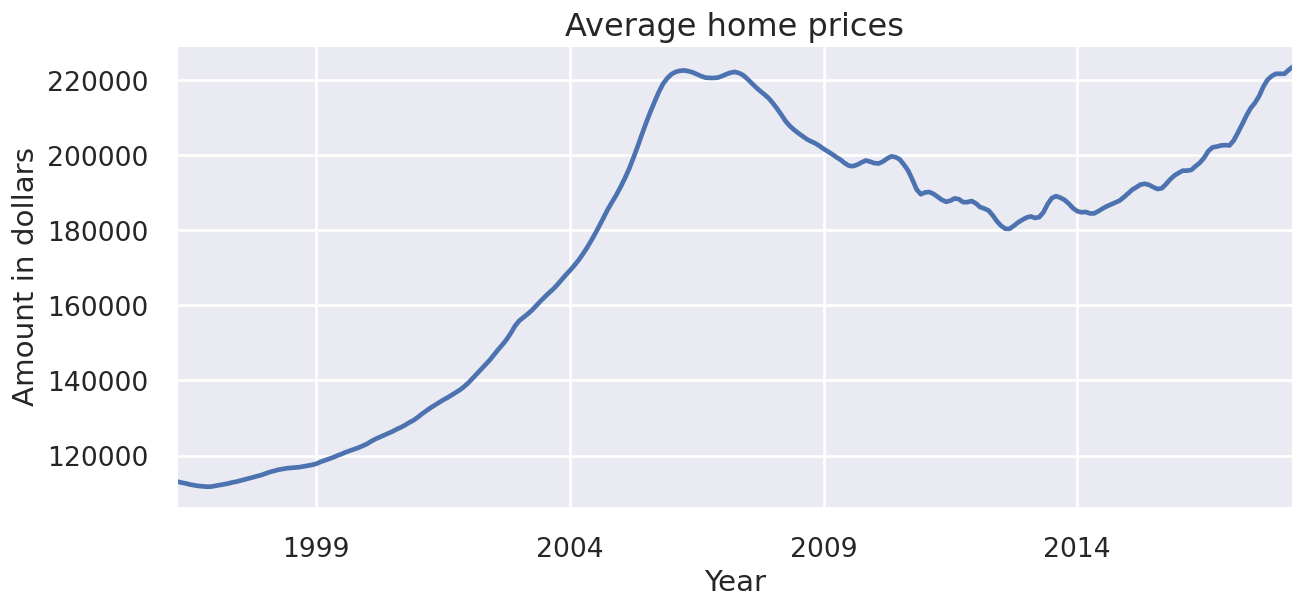

In [183]:
# Average prices of homes
ts = df.groupby('RegionName').get_group(zip_codes[0]).resample('MS').asfreq()
ts['value'].plot(figsize=(12,5))
plt.title('Average home prices')
plt.ylabel('Amount in dollars')
plt.xlabel('Year')
plt.show()

A drop in average house prices in the year 2007/2008

In [184]:
def get_ts(df, zipcode):

    ts = df.groupby('RegionName').get_group(zipcode).resample('MS').asfreq()
    ts = ts['value'].rename(zipcode)
    return ts

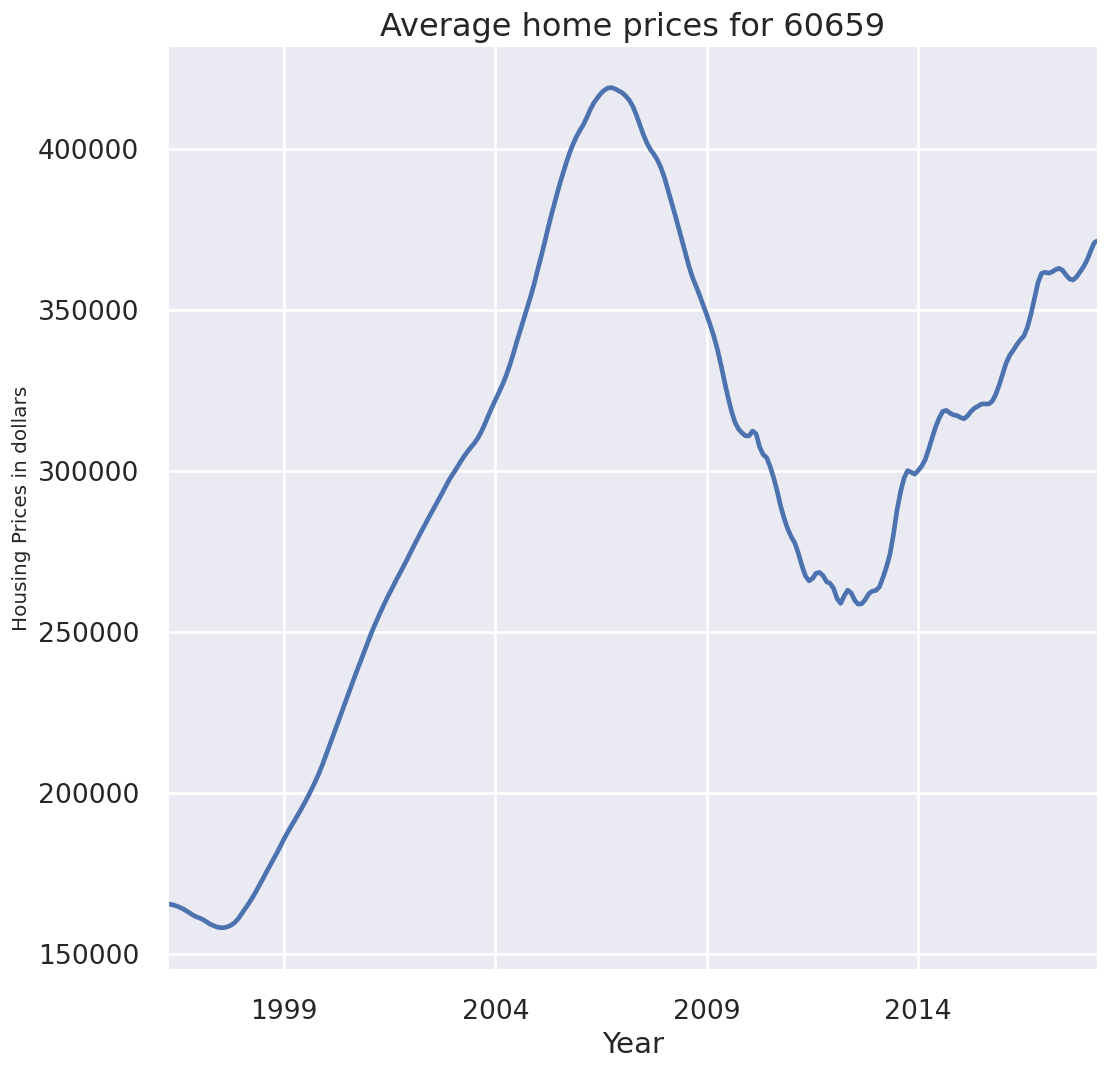

In [185]:
ts= get_ts(df, 60659)
ts.plot()
plt.title('Average home prices for 60659')
plt.ylabel('Housing Prices in dollars', fontsize= 12)
plt.xlabel('Year')
plt.show()

In [186]:
import random
random_state = 123
random_seed = random.Random(random_state)
zip_code = random_seed.sample(zip_codes,10)
zip_code

[6483, 28726, 10305, 93723, 44264, 28658, 11792, 3766, 38654, 60406]

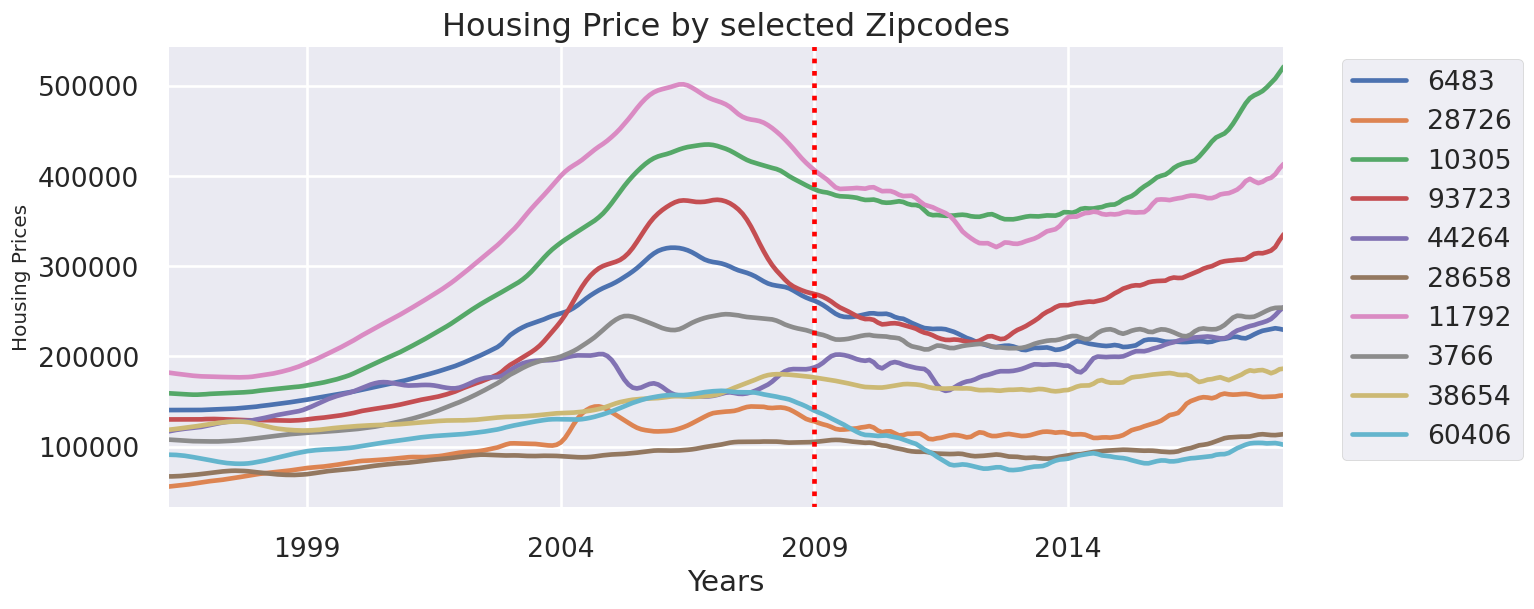

In [187]:
for i in range(len(zip_code)):
  ts = df.groupby('RegionName').get_group(zip_code[i]).resample('MS').asfreq()
  ts['value'].rename(zip_code[i]).plot(figsize= (12,5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=1)
plt.title('Housing Price by selected Zipcodes')
crash = '01-2009'
plt.axvline(crash, label='Housing Index Drops',color='red',ls=':')
plt.ylabel('Housing Prices', fontsize= 12)
plt.xlabel('Years')
plt.show()

### **Average home prices for the select zip codes**

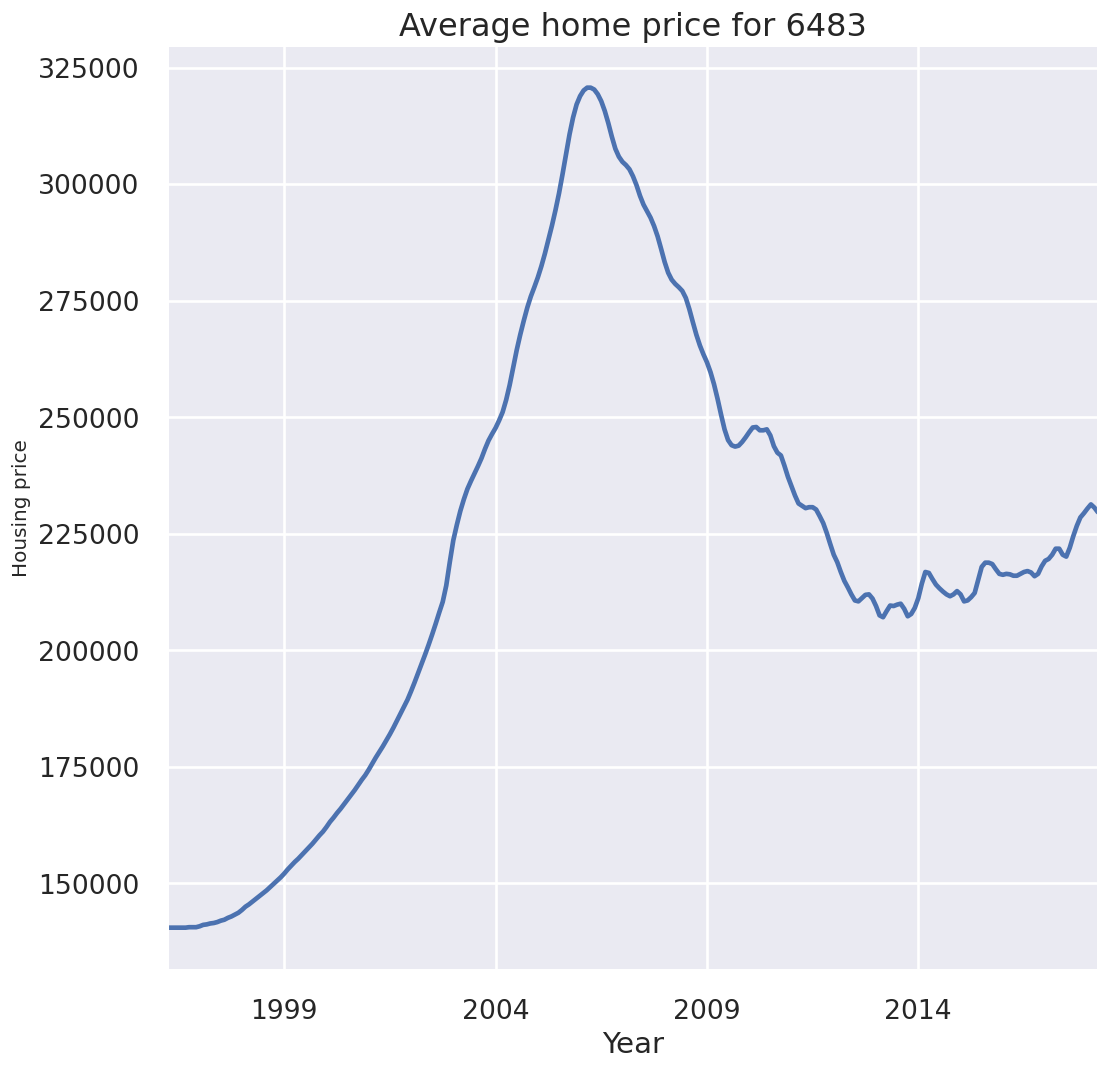

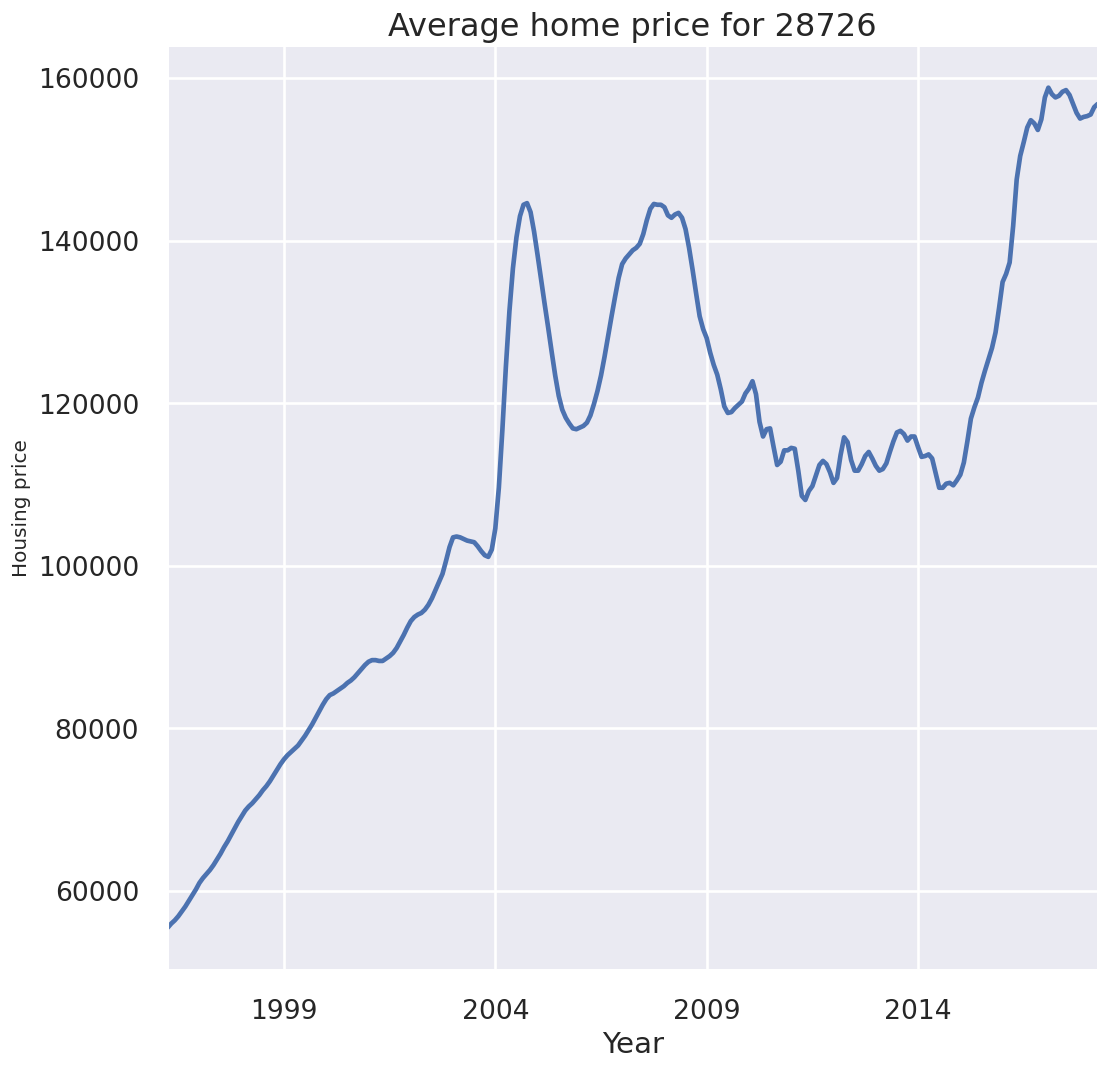

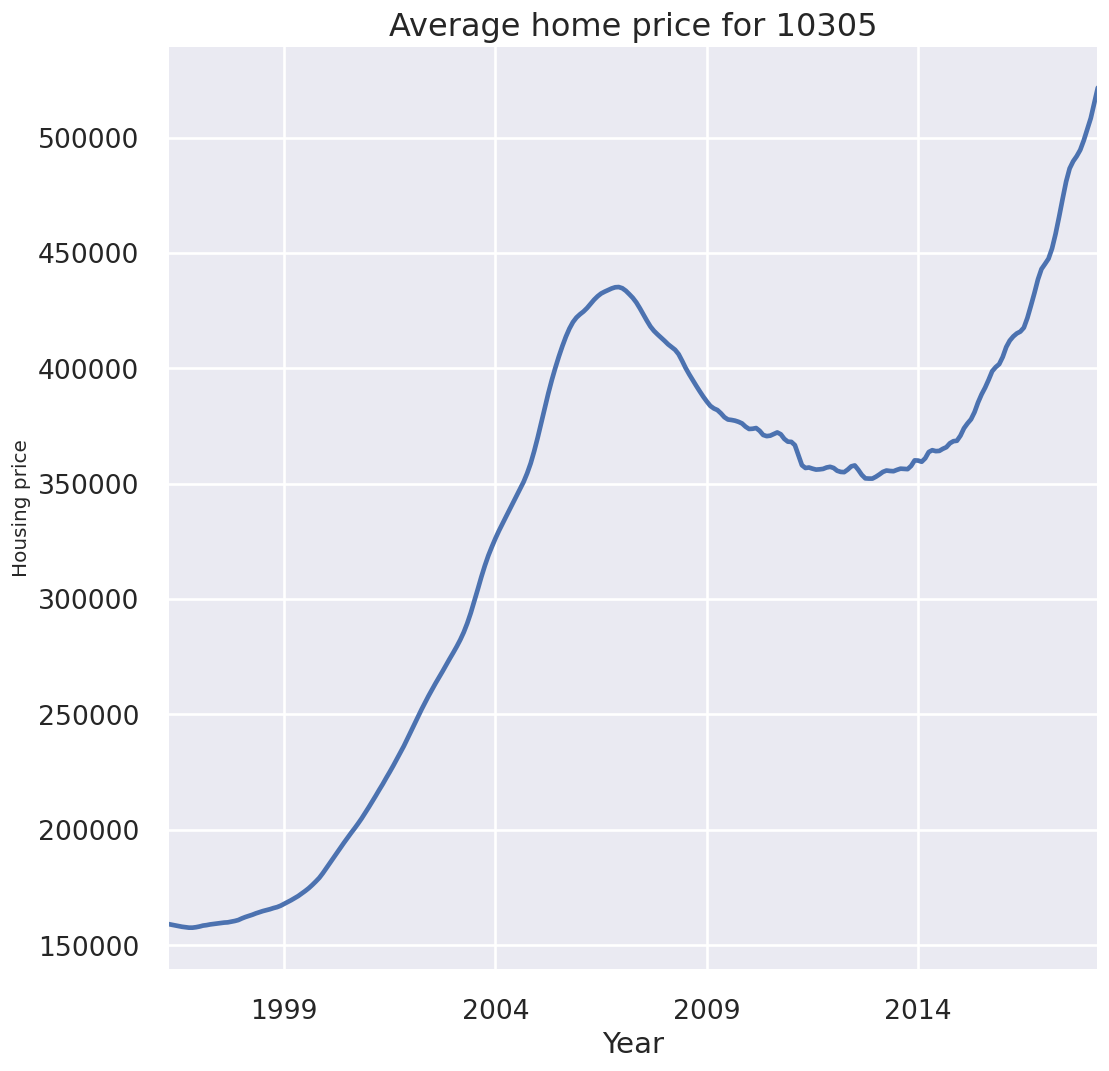

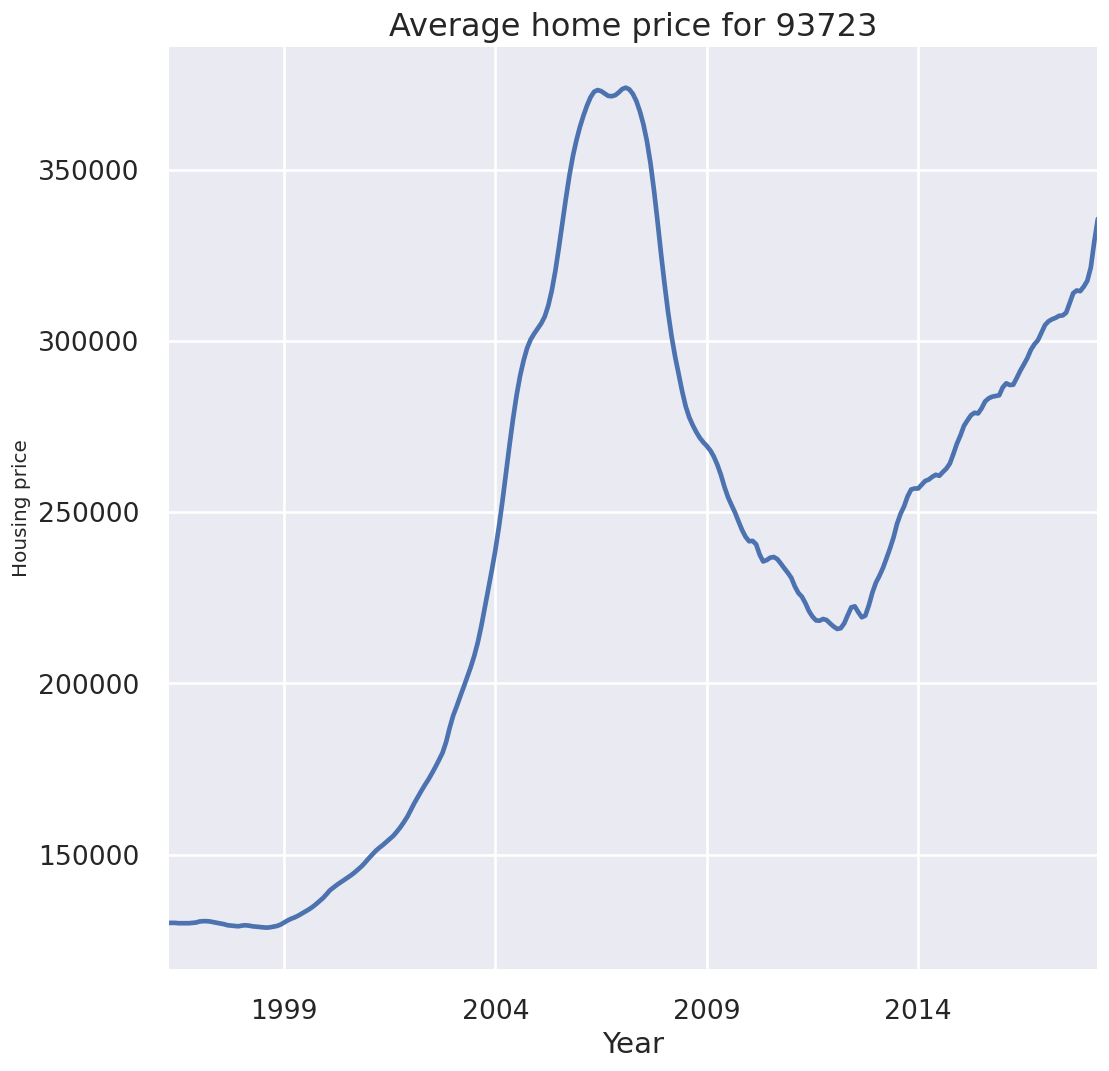

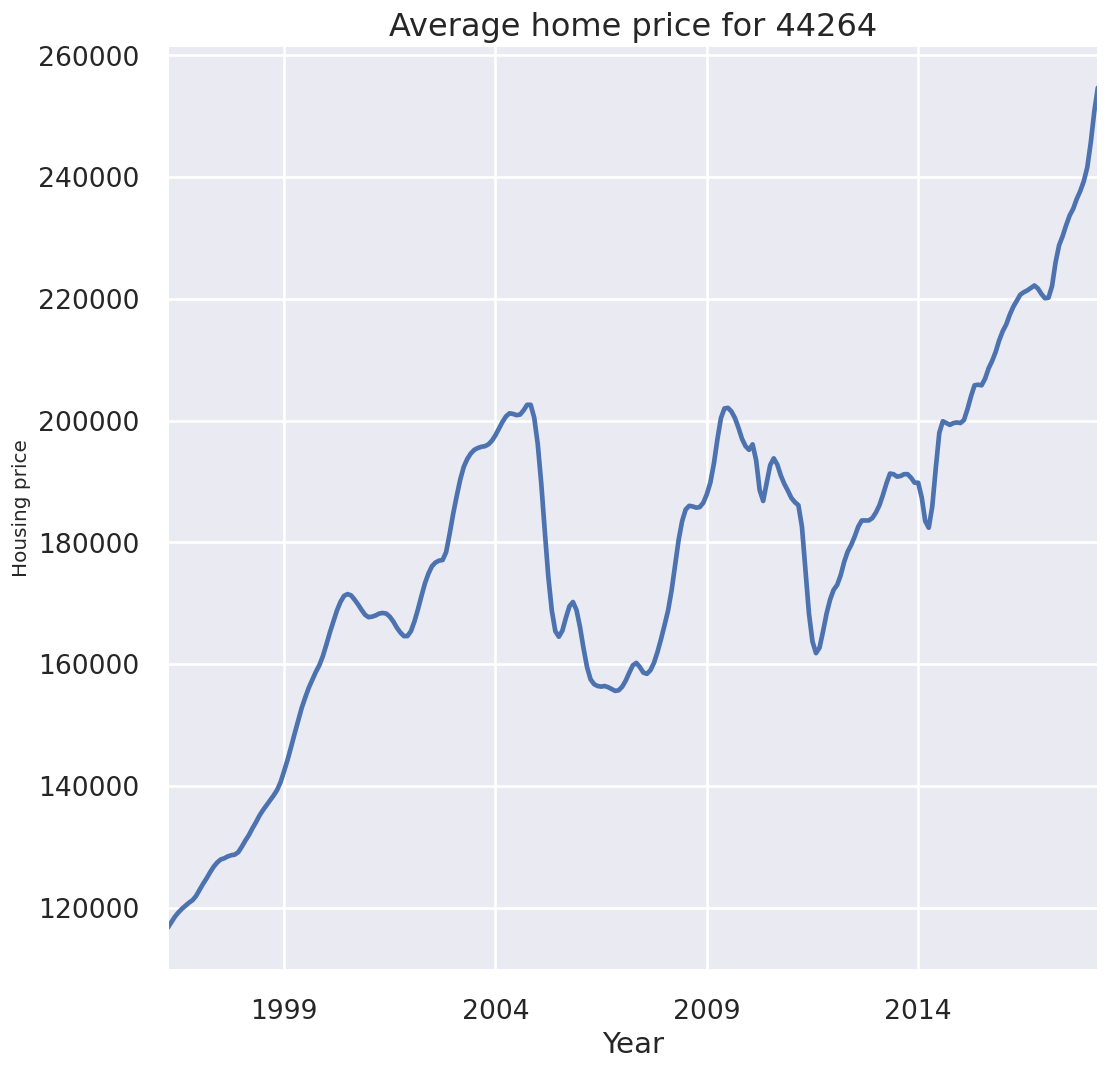

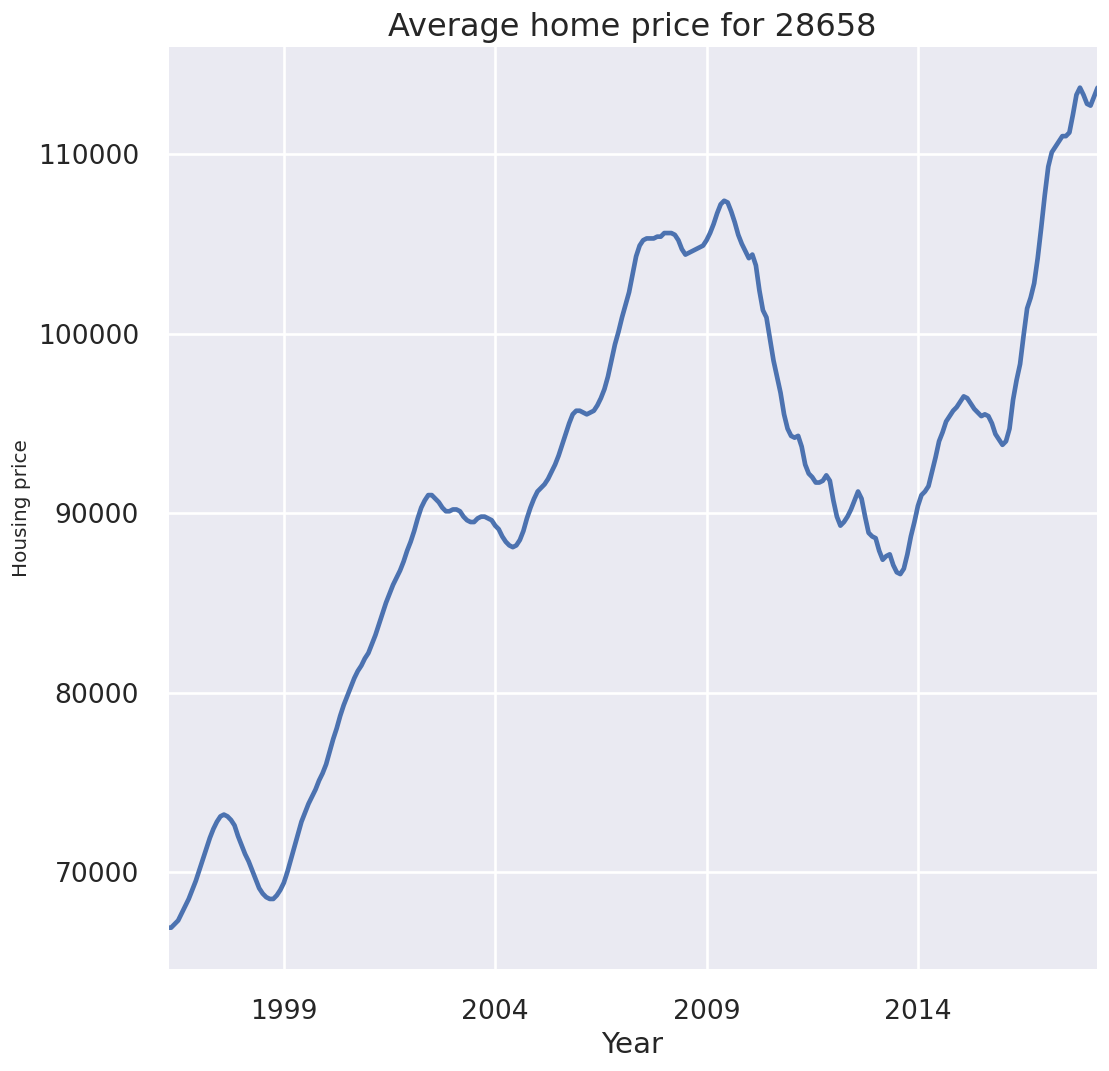

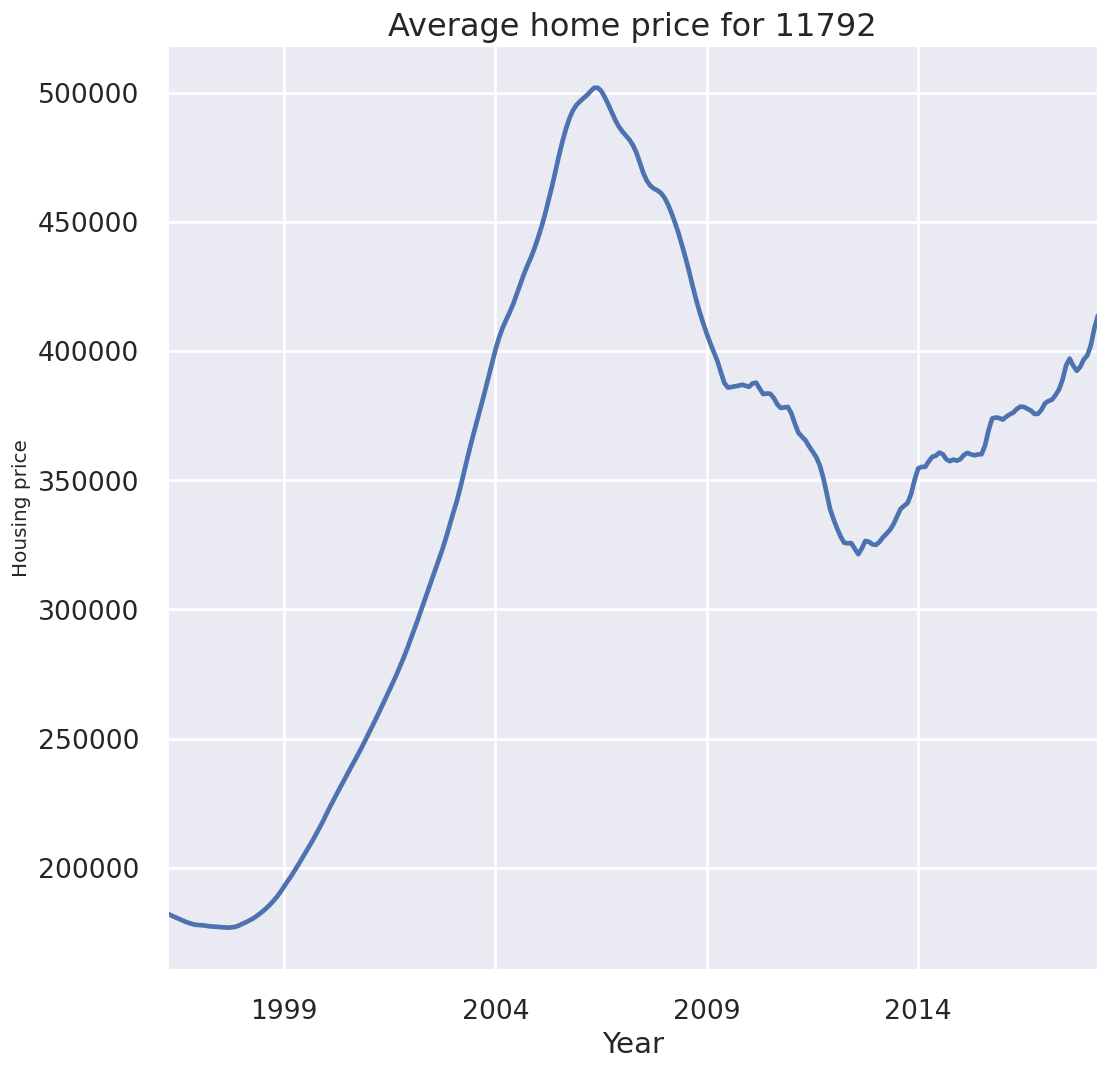

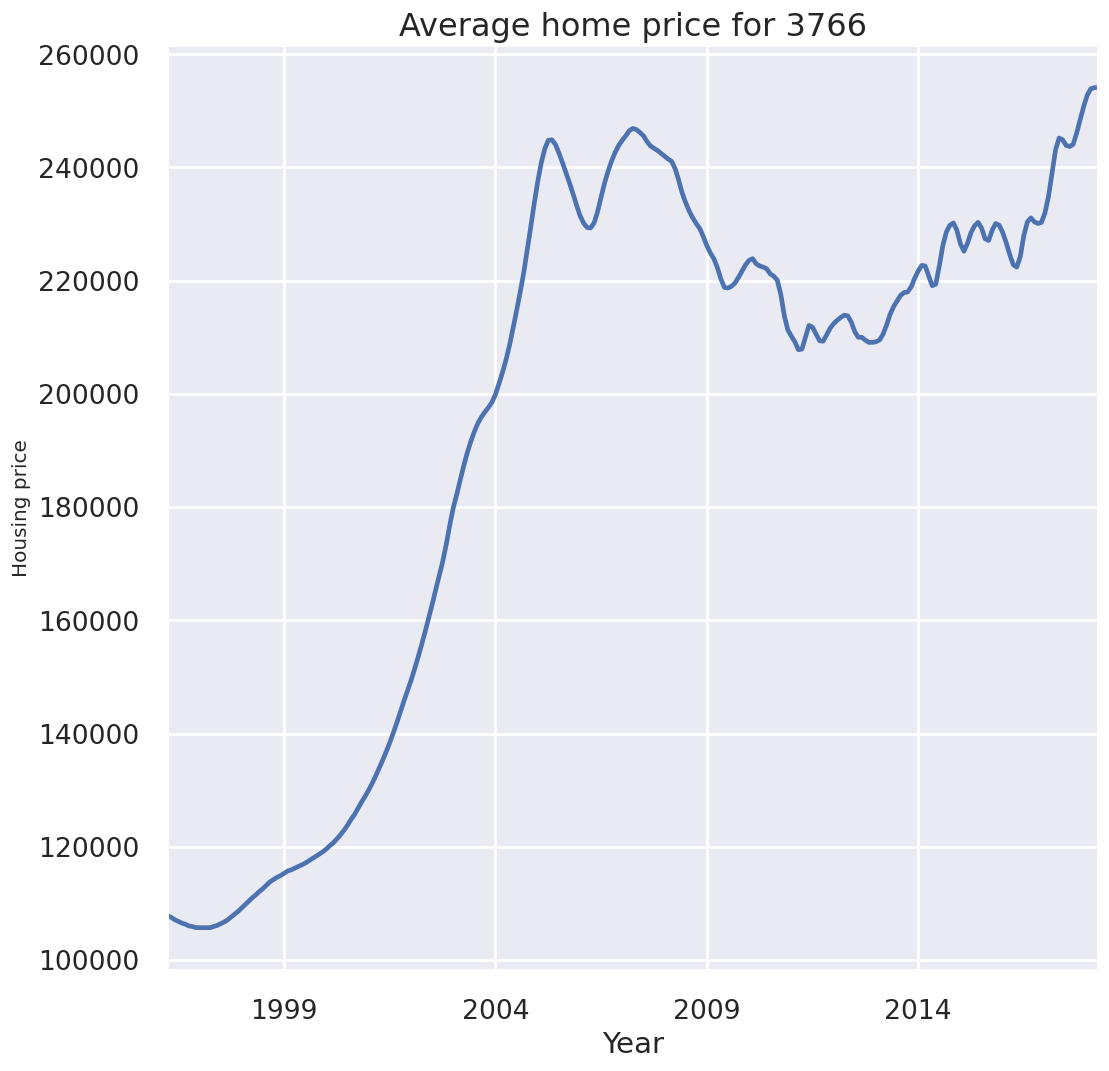

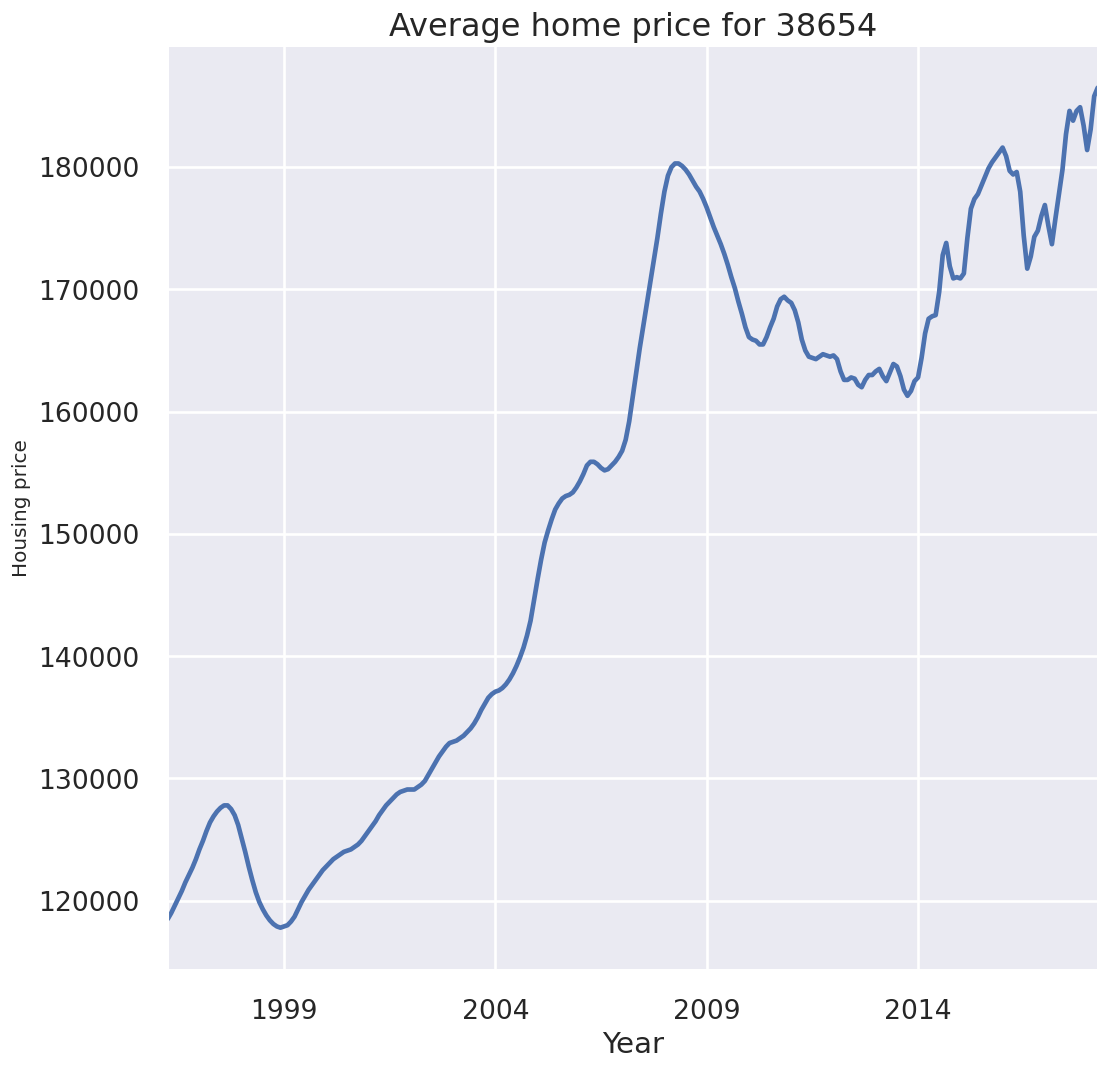

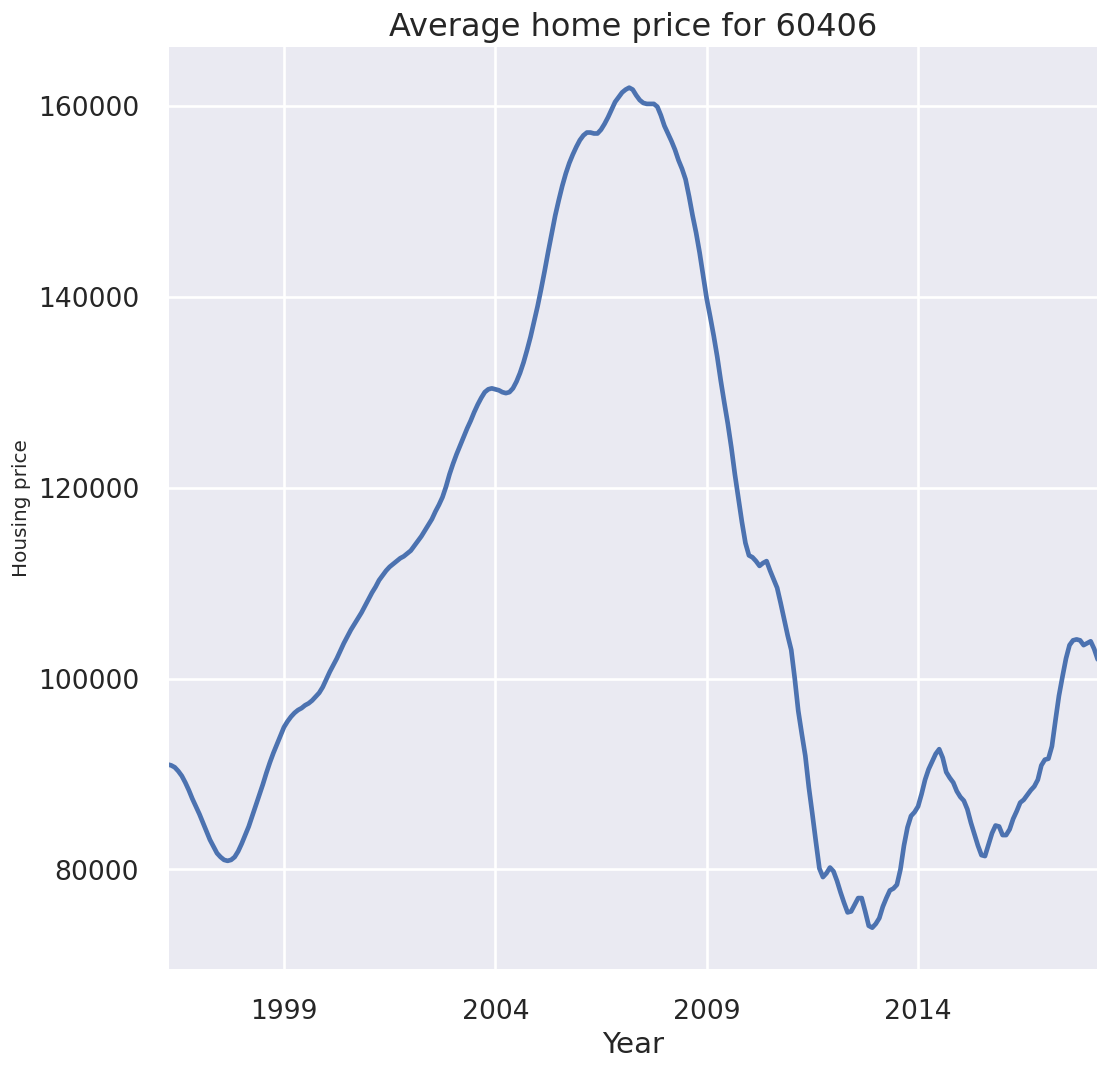

In [188]:
for i in zip_code:
  ts = get_ts(df, i)
  ts.plot()
  plt.title('Average home price for {}'.format(i))
  plt.ylabel('Housing price', fontsize= 12)
  plt.xlabel('Year')
  plt.show()

# Autocorrelation

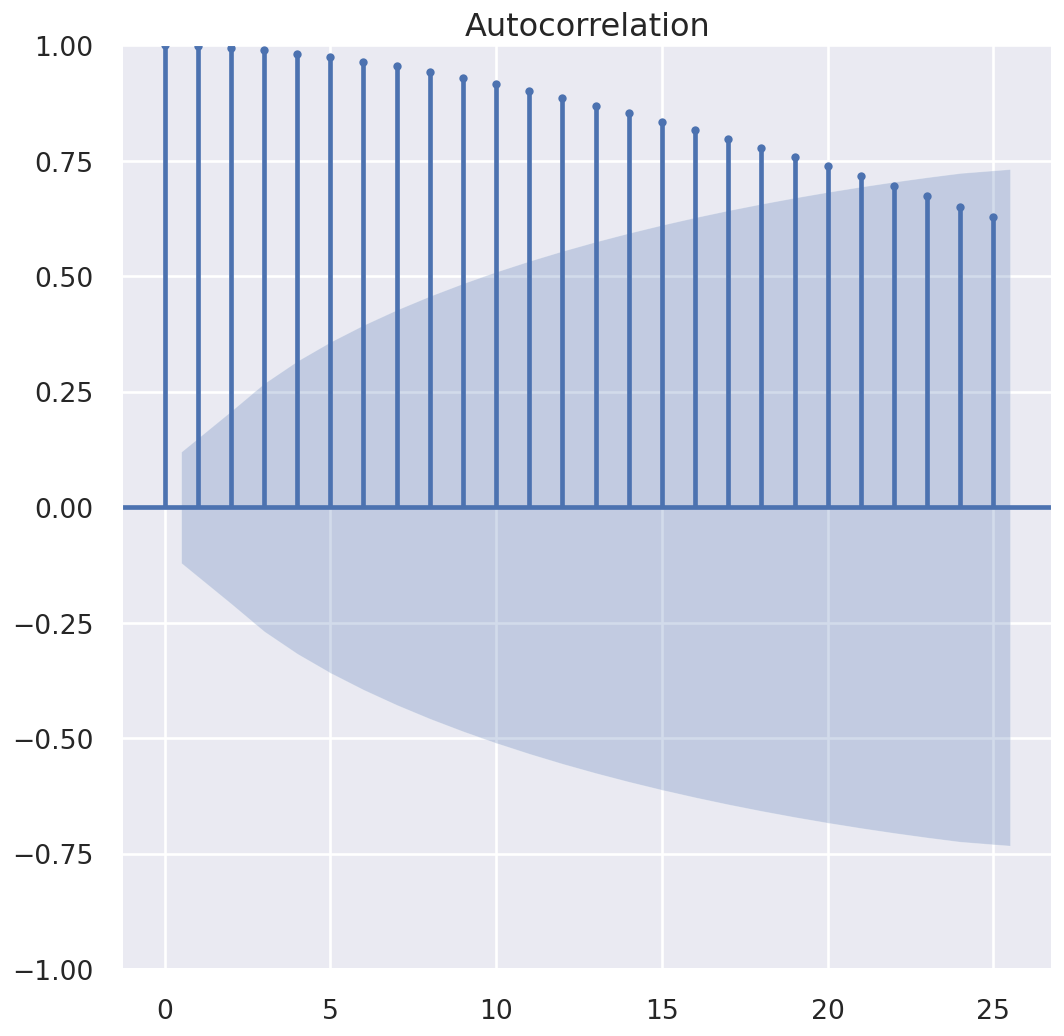

In [189]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot
plot_acf(ts);

Partial Autocorrelation

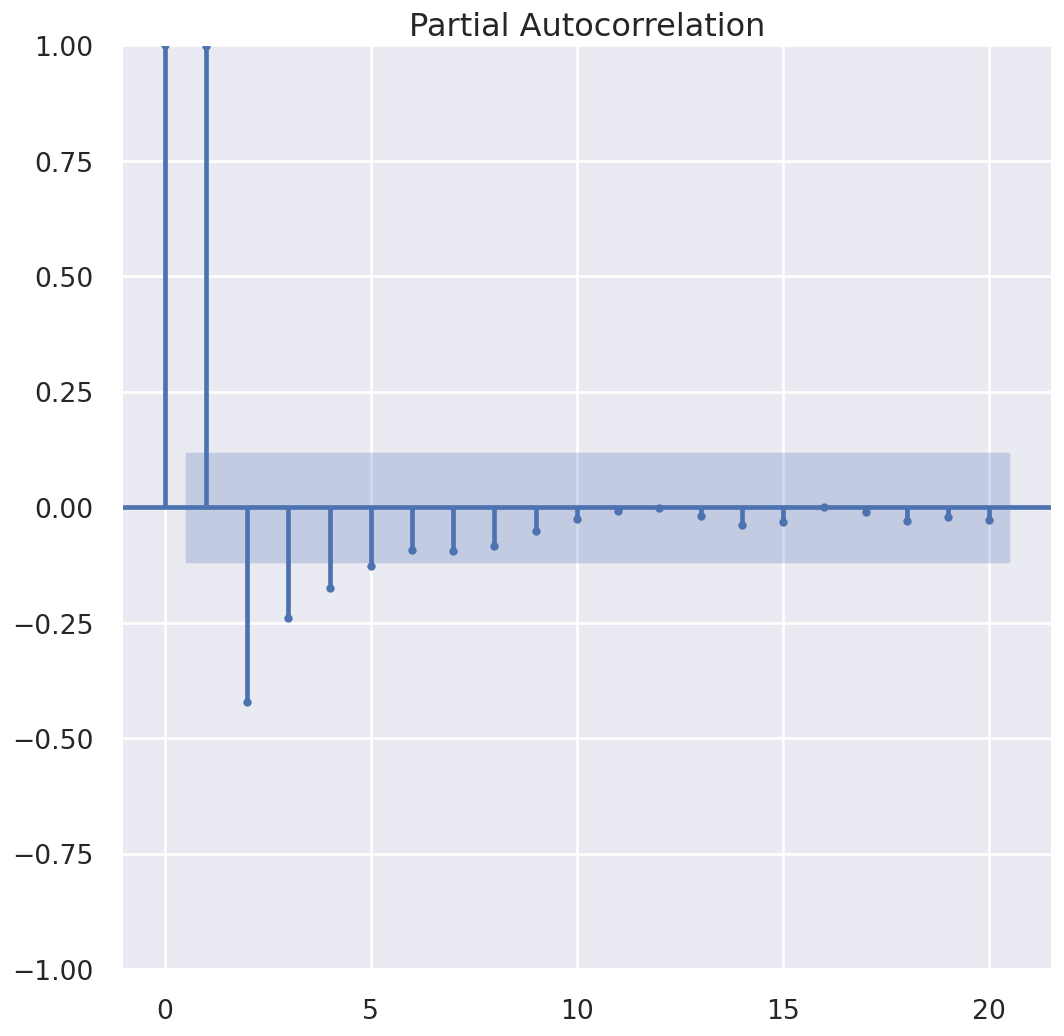

In [190]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot
plot_pacf(ts,method='ywm', lags = 20);

### Decomposition charts

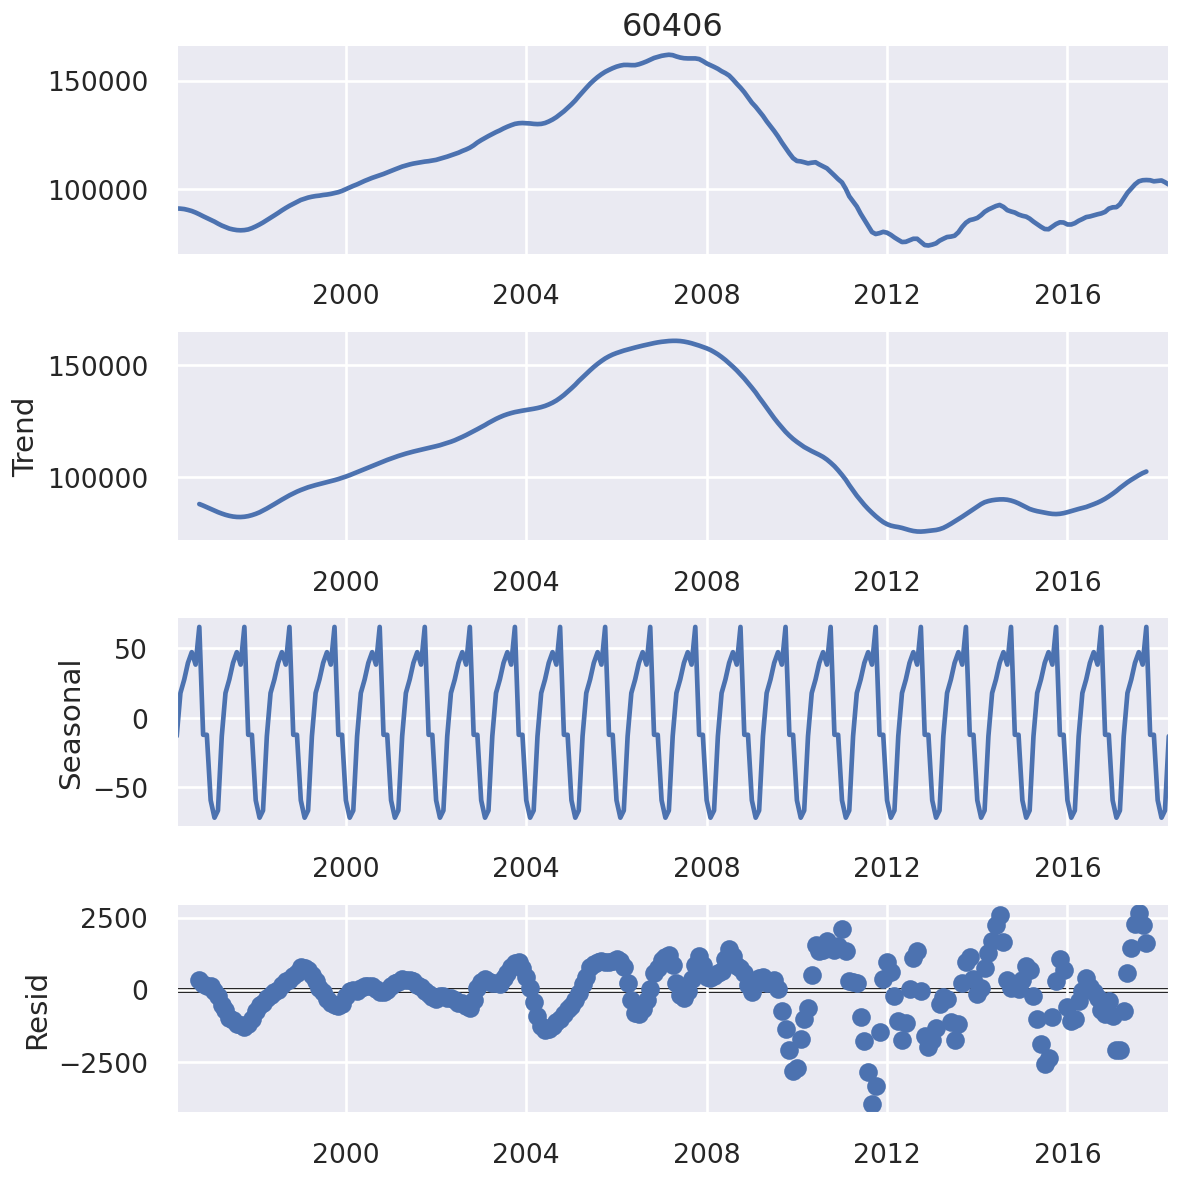

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_df = seasonal_decompose(ts)
decomp_df.plot();

### Differencing - Time series

In [192]:
# Differencing the time series
ts_diff = ts.diff(periods = 1).dropna()
ts_diff

date
1996-05-01    -100.0
1996-06-01    -200.0
1996-07-01    -400.0
1996-08-01    -500.0
1996-09-01    -700.0
               ...  
2017-12-01    -500.0
2018-01-01     200.0
2018-02-01     200.0
2018-03-01    -800.0
2018-04-01   -1100.0
Freq: MS, Name: 60406, Length: 264, dtype: float64

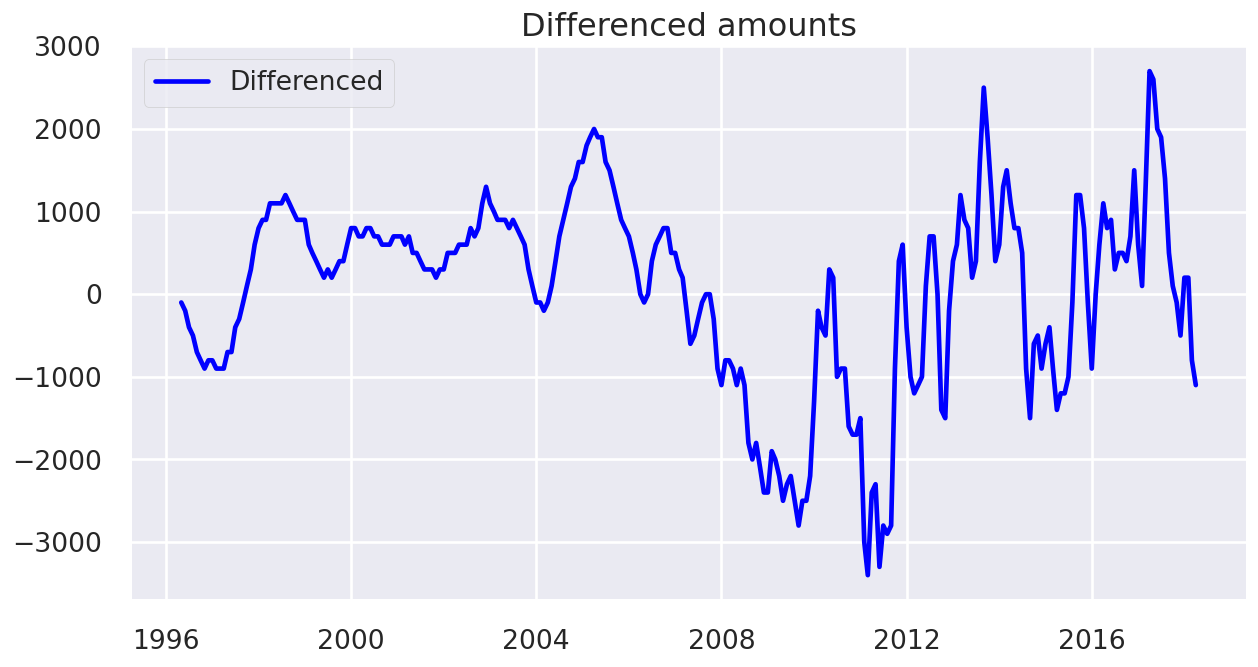

In [193]:
fig = plt.figure(figsize=(12,6))
plt.plot(ts_diff, color='blue',label='Differenced')
plt.legend(loc='best')
plt.title('Differenced amounts')
plt.show(block=False)

# Step 5: ARIMA Modeling

### ARIMA models aim to describe the autocorrelations in the data.

### **Data Split - Train test split sets**

In [194]:
def get_train_test_split_index(ts, TEST_SIZE=0.1,min_test_ts=2):
    import math
    idx_split = math.floor(len(ts.index)*(1-TEST_SIZE))

    num_test_ts=len(ts.iloc[idx_split:])
    if num_test_ts<min_test_ts:
        idx_split = len(ts)-min_test_ts

    return idx_split


def train_test_split_ts(ts,test_size=0.2,min_test_ts=2):
    idx_split = get_train_test_split_index(ts,TEST_SIZE=test_size,
                                           min_test_ts=min_test_ts)
    ts_train = ts.iloc[:idx_split]
    ts_test = ts.iloc[idx_split:]
    return ts_train, ts_test

In [195]:
ts_train, ts_test = train_test_split_ts(ts, test_size=0.2, min_test_ts=2)

In [196]:
ts_train.shape ,  ts_test.shape , ts_test.index

((212,),
 (53,),
 DatetimeIndex(['2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
                '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
                '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
                '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
                '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
                '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
                '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
                '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
                '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
                '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
                '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
                '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
                '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
                '2018-04-01'],
               d

### Best pdq Parameters

In [197]:
import itertools
p = range(0,4)
q = range(0,4)
d = range(0,3)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1)]

In [198]:
param = [['pdq', 'AIC']]

for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(ts_train,
                                        order=comb,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        output = mod.fit()
        param.append([comb, output.aic])
        print('ARIMA {} : AIC Calculated ={}'.format(comb, output.aic))
    except:
        print(f"error using {comb}")
        continue

ARIMA (0, 0, 0) : AIC Calculated =5528.036719171438
ARIMA (0, 0, 1) : AIC Calculated =5350.999632598596
ARIMA (0, 0, 2) : AIC Calculated =5292.458747879626
ARIMA (0, 0, 3) : AIC Calculated =6685.885800410226
ARIMA (0, 1, 0) : AIC Calculated =3570.1012786603014
ARIMA (0, 1, 1) : AIC Calculated =3314.4744244540307
ARIMA (0, 1, 2) : AIC Calculated =3139.335924254561
ARIMA (0, 1, 3) : AIC Calculated =3101.632126115672
ARIMA (0, 2, 0) : AIC Calculated =3088.5121631367574
ARIMA (0, 2, 1) : AIC Calculated =3036.8274208177654
ARIMA (0, 2, 2) : AIC Calculated =3020.873594297466
ARIMA (0, 2, 3) : AIC Calculated =2997.319103955216
ARIMA (1, 0, 0) : AIC Calculated =3587.9921132779873
ARIMA (1, 0, 1) : AIC Calculated =3331.751242320057
ARIMA (1, 0, 2) : AIC Calculated =3156.6685024033773
ARIMA (1, 0, 3) : AIC Calculated =3292.661815409877
ARIMA (1, 1, 0) : AIC Calculated =3099.0922180467546
ARIMA (1, 1, 1) : AIC Calculated =3046.860894231675
ARIMA (1, 1, 2) : AIC Calculated =3027.7601968241224
ARIM

### Best parameters

In [199]:
def best_params(param):

    df_result = pd.DataFrame(param[1:], columns=param[0])
    df_result = df_result.sort_values('AIC', ascending= True).reset_index()
    best_param = df_result.iloc[0]['pdq']
    display(df_result.head())

    return best_param

In [200]:
best_params(param)

index        pdq          AIC
0     23  (1, 2, 3)  2992.242164
1     35  (2, 2, 3)  2993.654994
2     47  (3, 2, 3)  2995.451192
3     11  (0, 2, 3)  2997.319104
4     31  (2, 1, 3)  3002.431956

(1, 2, 3)

### Model: best AIC

In [201]:
model = sm.tsa.statespace.SARIMAX(ts_train,
                                        order=best_params(param),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

output = model.fit()

output.summary()

index        pdq          AIC
0     23  (1, 2, 3)  2992.242164
1     35  (2, 2, 3)  2993.654994
2     47  (3, 2, 3)  2995.451192
3     11  (0, 2, 3)  2997.319104
4     31  (2, 1, 3)  3002.431956

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  60406   No. Observations:                  212
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -1491.121
Date:                Tue, 20 Jun 2023   AIC                           2992.242
Time:                        19:11:35   BIC                           3008.882
Sample:                    04-01-1996   HQIC                          2998.972
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5745      0.082     -7.033      0.000      -0.735      -0.414
ma.L1          1.0953      0.091     12.041      0.000       0.917       1.274
ma.L2          0.0772      0.089      0.870      0.384      -0.097       0.251
ma.L3         -0.3433      0.048     -7.143      0.000      -0.437      -0.249
sigma2      1.114e+05   6219.680     17.903      0.000    9.92e+04    1.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               364.45
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              13.32   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Results and Predictions

In [202]:
start=ts_test.index[0]
end=ts_test.index[-1]
# predictions
predictions = output.get_prediction(start=start,end=end,
                                         dynamic=True)
ts_pred = predictions.predicted_mean

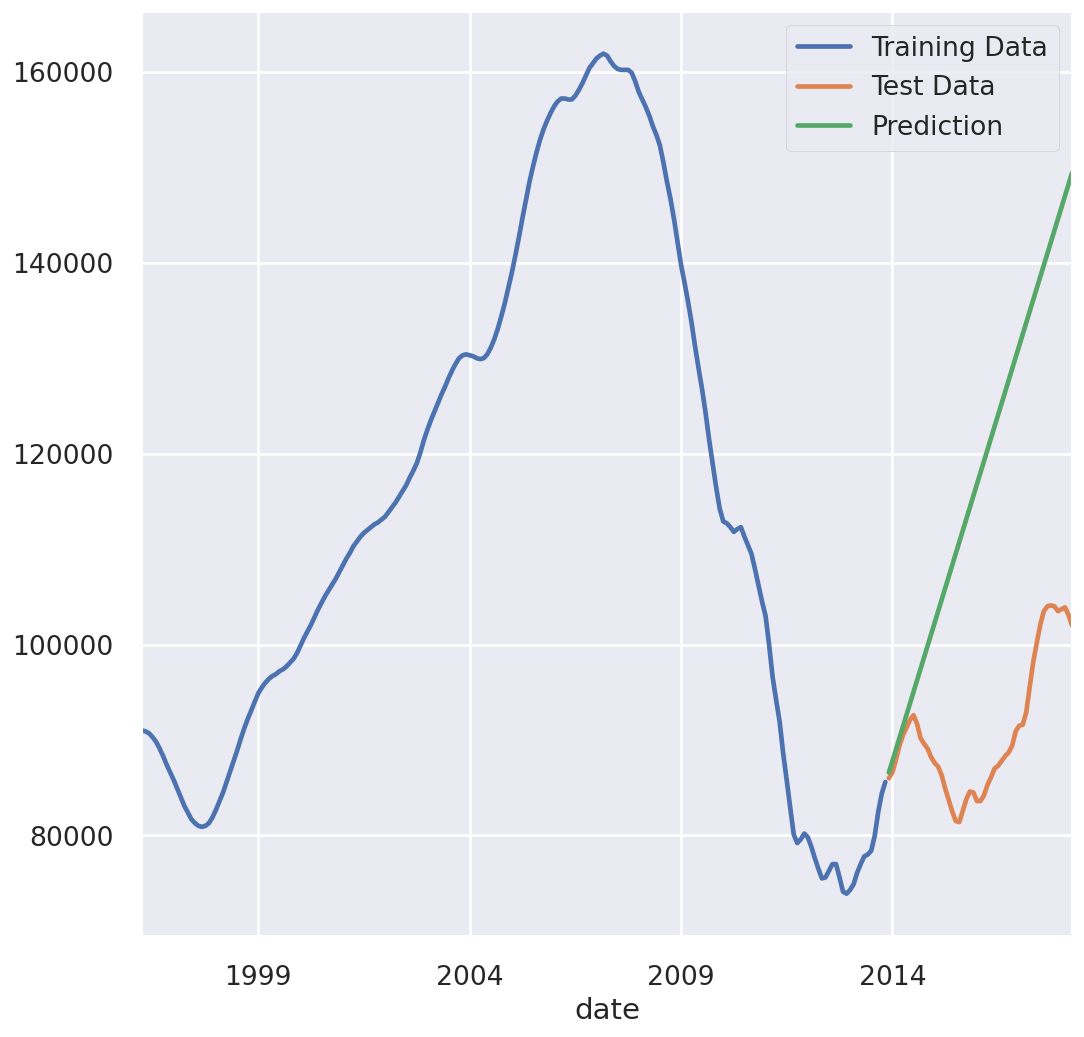

In [203]:
#plotting
ts_train.plot(label= 'Training Data')
ts_test.plot(label= 'Test Data')
ts_pred.plot(label= 'Prediction')
plt.legend()

### Multiple zip codes

In [204]:
# multiple zipcodes

def models(ts, params):

    model = sm.tsa.statespace.SARIMAX(ts,
                                      order=params,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    output = model.fit()
    display(output.summary())
    return output

In [205]:
def preds_ts(ts_train, ts_test, output=output):

    start=ts_test.index[0]
    end=ts_test.index[-1]
    # predictions
    prediction = output.get_prediction(start=start, end= end, dynamic=True)
    ts_pred = predictions.predicted_mean
    ts_conf = predictions.conf_int()

    ts_train.plot(label= 'Training Data')
    ts_test.plot(label= 'Test Data')
    ts_pred.plot(label= 'Prediction')
    plt.fill_between(ts_conf.index, ts_conf.iloc[:,0], ts_conf.iloc[:,1])
    plt.legend()
    plt.ylabel('Dollar Amounts')
    plt.xlabel('Years')
    plt.title('Time Values')
    plt.show()

    return ts_pred

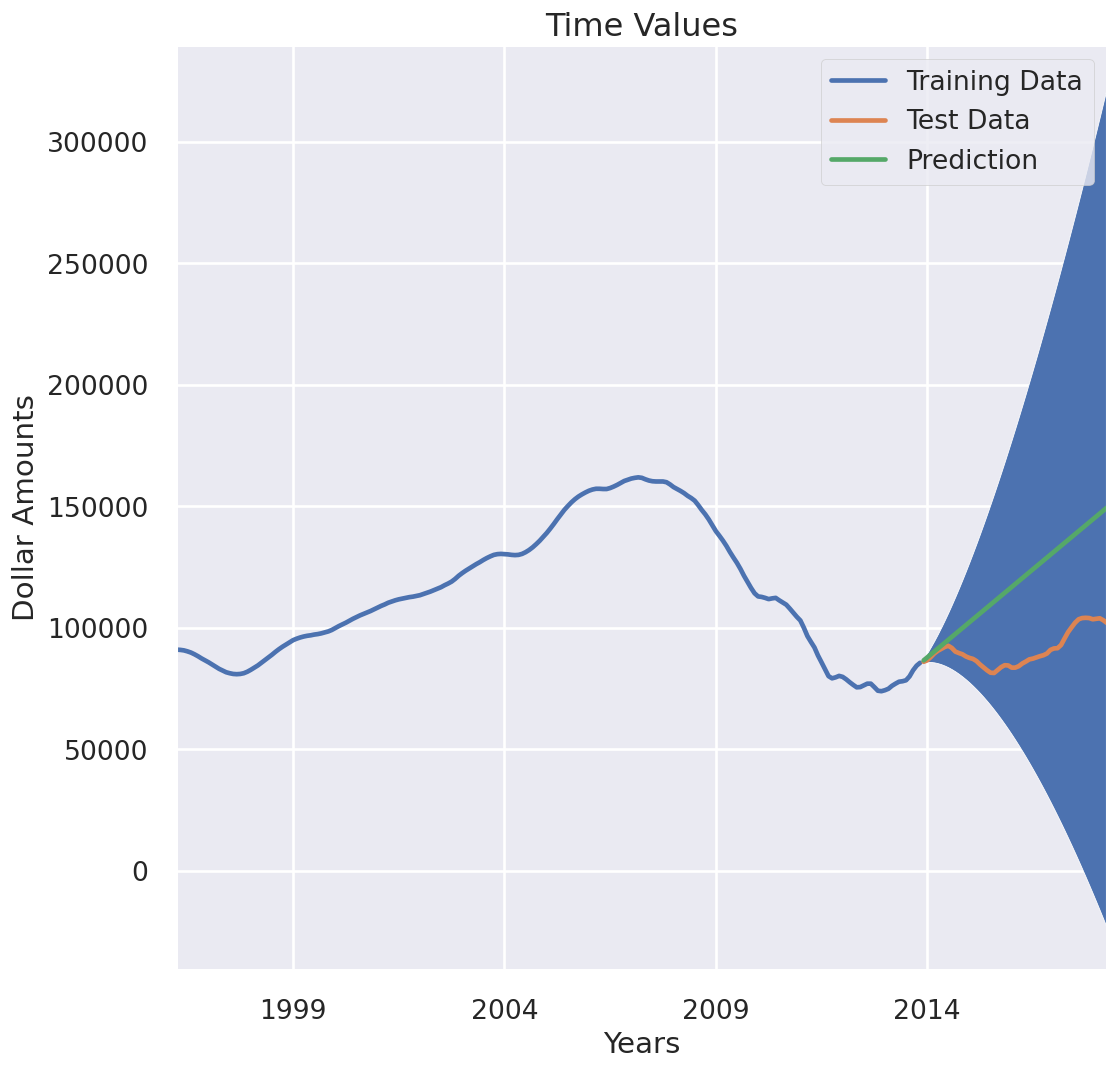

2013-12-01     86589.209503
2014-01-01     87776.159157
2014-02-01     88997.304510
2014-03-01     90198.803137
2014-04-01     91411.589554
2014-05-01     92617.890707
2014-06-01     93827.917890
2014-07-01     95035.804328
2014-08-01     96244.920705
2014-09-01     97453.330435
2014-10-01     98662.146161
2014-11-01     99870.728626
2014-12-01    101079.445109
2015-01-01    102288.084594
2015-02-01    103496.768317
2015-03-01    104705.426623
2015-04-01    105914.099532
2015-05-01    107122.764051
2015-06-01    108331.433391
2015-07-01    109540.099961
2015-08-01    110748.768123
2015-09-01    111957.435370
2015-10-01    113166.103142
2015-11-01    114374.770613
2015-12-01    115583.438257
2016-01-01    116792.105801
2016-02-01    118000.773403
2016-03-01    119209.440971
2016-04-01    120418.108559
2016-05-01    121626.776136
2016-06-01    122835.443719
2016-07-01    124044.111298
2016-08-01    125252.778879
2016-09-01    126461.446460
2016-10-01    127670.114041
2016-11-01    128878

In [206]:
preds_ts(ts_train, ts_test)

### Best Parmeters generated

In [207]:
# Function to get best parameters for loop for all zip codes
def best_params1(ts, p=5, d=3, q=5, start_date='2016-04-01'):


    ts_train = ts.loc[:start_date]
    ts_test = ts.loc[start_date:]



    p = range(0,p)
    d=range(0,d)
    q = range(0,q)


    pdq = list(itertools.product(p,d,q))


    #  best AIC value
    param = [['pdq', 'AIC']]

    for comb in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_train,
                                            order=comb,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            param.append([comb, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


    df_result = pd.DataFrame(param[1:], columns=param[0])
    df_result = df_result.sort_values('AIC', ascending= True).reset_index()
    best_params = df_result.iloc[0]['pdq']
    display(df_result.head())

    return best_params, ts_train, ts_test

In [208]:
params_test, ts_train, ts_test = best_params1(ts, 2,2,2)

index        pdq          AIC
0      7  (1, 1, 1)  3501.367969
1      6  (1, 1, 0)  3565.481703
2      3  (0, 1, 1)  3767.856322
3      5  (1, 0, 1)  3859.720958
4      2  (0, 1, 0)  4051.233716

In [209]:
output_test = models(ts_train, params_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  60406   No. Observations:                  241
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1747.684
Date:                Tue, 20 Jun 2023   AIC                           3501.368
Time:                        19:11:40   BIC                           3511.785
Sample:                    04-01-1996   HQIC                          3505.566
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8839      0.025     34.859      0.000       0.834       0.934
ma.L1          0.5070      0.040     12.736      0.000       0.429       0.585
sigma2      1.387e+05   8094.128     17.135      0.000    1.23e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):               126.40
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              10.61   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

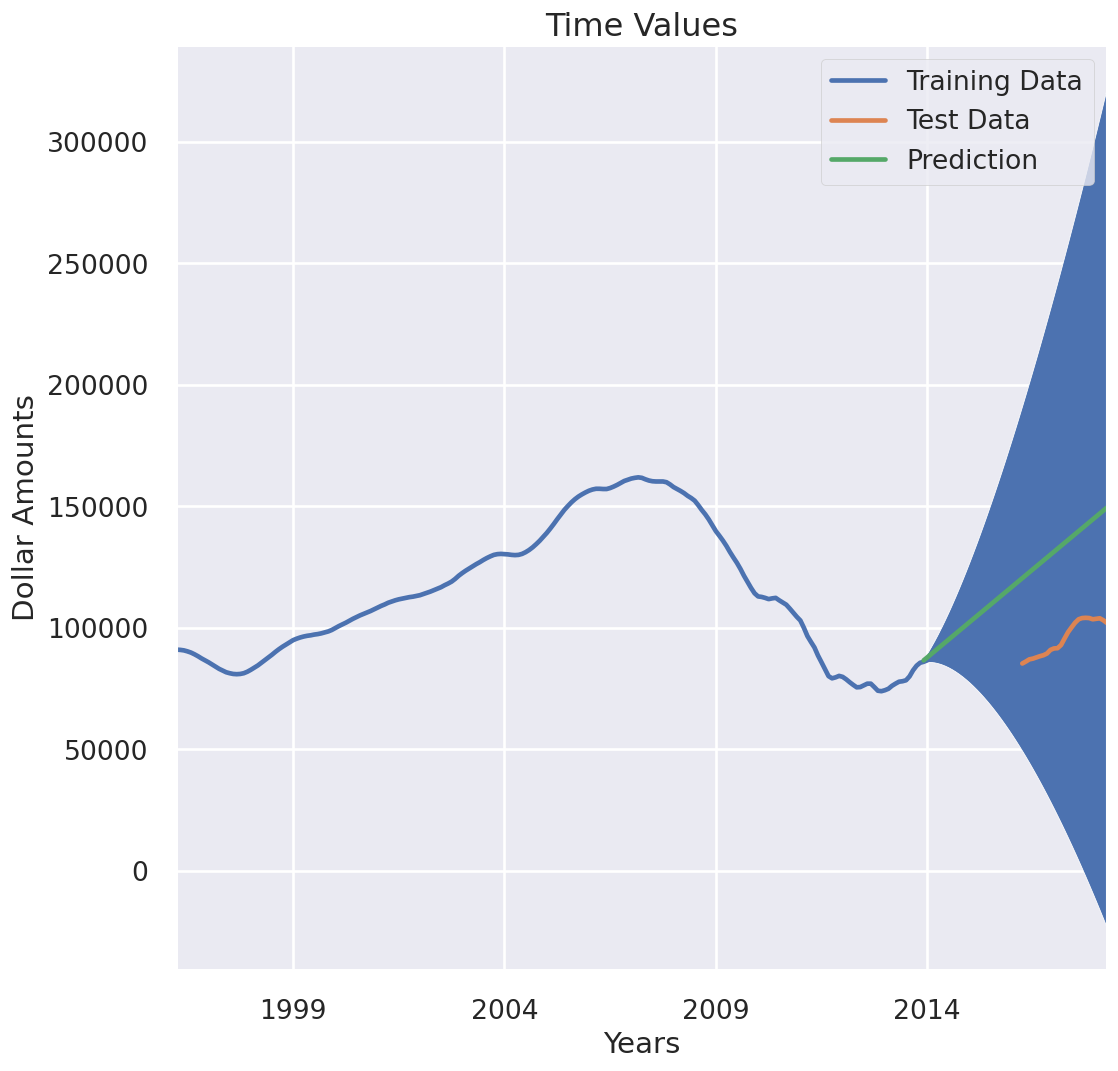

2013-12-01     86589.209503
2014-01-01     87776.159157
2014-02-01     88997.304510
2014-03-01     90198.803137
2014-04-01     91411.589554
2014-05-01     92617.890707
2014-06-01     93827.917890
2014-07-01     95035.804328
2014-08-01     96244.920705
2014-09-01     97453.330435
2014-10-01     98662.146161
2014-11-01     99870.728626
2014-12-01    101079.445109
2015-01-01    102288.084594
2015-02-01    103496.768317
2015-03-01    104705.426623
2015-04-01    105914.099532
2015-05-01    107122.764051
2015-06-01    108331.433391
2015-07-01    109540.099961
2015-08-01    110748.768123
2015-09-01    111957.435370
2015-10-01    113166.103142
2015-11-01    114374.770613
2015-12-01    115583.438257
2016-01-01    116792.105801
2016-02-01    118000.773403
2016-03-01    119209.440971
2016-04-01    120418.108559
2016-05-01    121626.776136
2016-06-01    122835.443719
2016-07-01    124044.111298
2016-08-01    125252.778879
2016-09-01    126461.446460
2016-10-01    127670.114041
2016-11-01    128878

In [210]:
preds_ts(ts_train, ts_test, output_test)

# Step 6: Interpreting Results

### ***Return on Investment***

In [211]:
# ROI function
def expected_roi(investment, fvalue):
  roi = np.round(((fvalue - investment) / investment)*100,3)
  return roi

In [212]:
def forecast_out(ts, output=output):

    start=pd.to_datetime('2008-04-01')
    end=pd.to_datetime('2018-04-01')

    #  predictions
    predictions = output.get_prediction(start=start , end=end , dynamic=True)
    ts_pred = predictions.predicted_mean
    ts_conf = predictions.conf_int()

    investment = ts.loc[start]
    fvalue = ts_pred.loc[end]

    e_roi = expected_roi(investment, fvalue)

    ts.plot(label= 'Raw Data')
    ts_pred.plot(label= 'Prediction')
    plt.fill_between(ts_conf.index, ts_conf.iloc[:,0], ts_conf.iloc[:,1])
    plt.legend()
    plt.ylabel('Dollar Amounts')
    plt.xlabel('Years')
    plt.title(f'Forecast for {ts.name} (ROI={e_roi}%)')
    plt.show()

    fig = plt.gcf()

    return ts_pred, e_roi , fig

6483


index        pdq          AIC
0      8  (2, 0, 2)  3644.438114
1      6  (2, 0, 0)  3732.276273
2      7  (2, 0, 1)  3734.576291
3      5  (1, 0, 2)  3747.780925
4      4  (1, 0, 1)  4057.331968

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6483   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2010.874
Date:                Tue, 20 Jun 2023   AIC                           4031.747
Time:                        19:11:43   BIC                           4049.589
Sample:                    04-01-1996   HQIC                          4038.918
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8474      0.034     53.777      0.000       1.780       1.915
ar.L2         -0.8473      0.034    -24.647      0.000      -0.915      -0.780
ma.L1          0.7214      0.050     14.481      0.000       0.624       0.819
ma.L2          0.1000      0.042      2.374      0.018       0.017       0.182
sigma2      2.606e+05   9.27e-08   2.81e+12      0.000    2.61e+05    2.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                59.38
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               7.04   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+28. Standard errors may be unstable.
"""

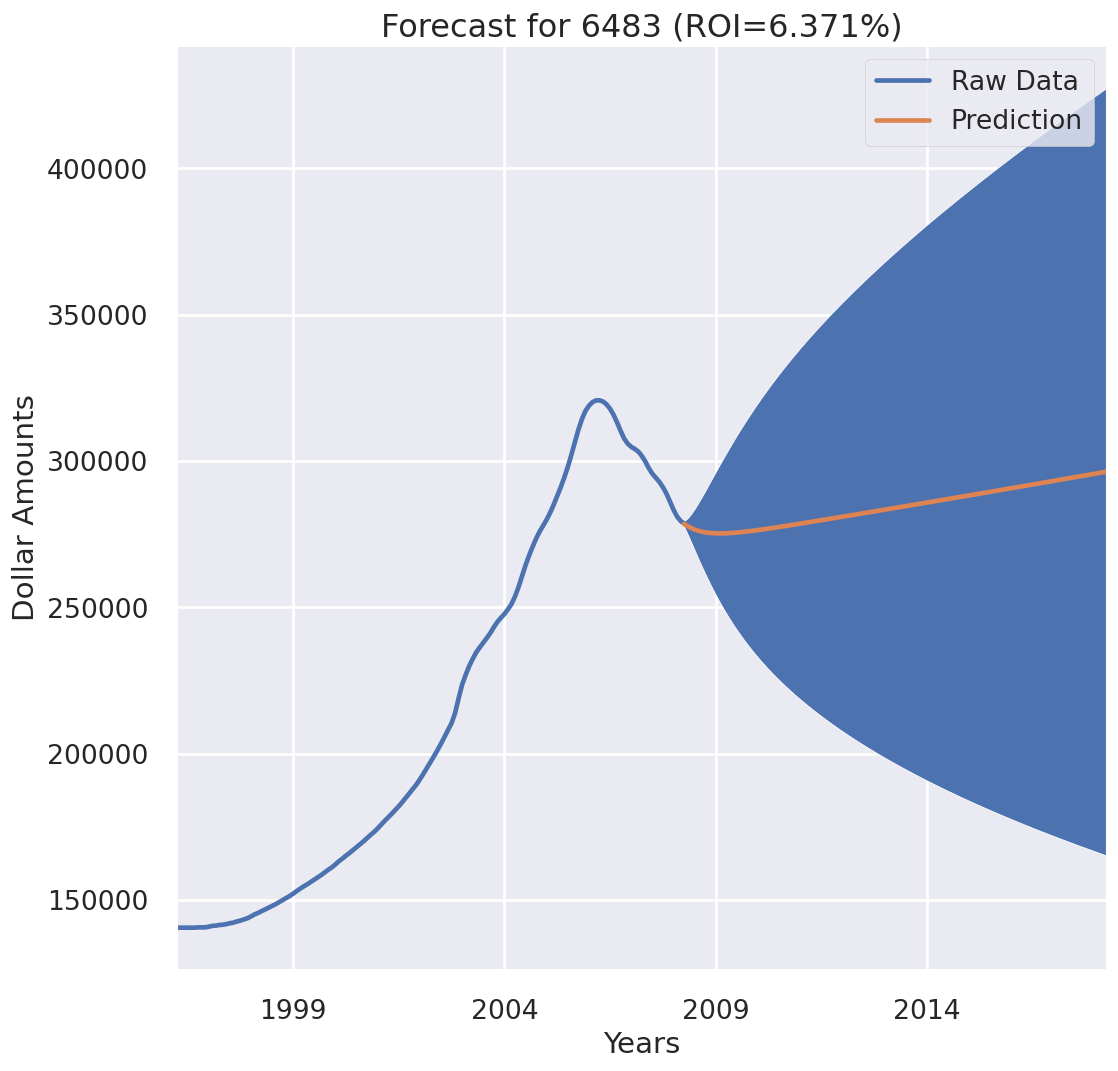

28726


index        pdq          AIC
0      8  (2, 0, 2)  3750.470602
1      5  (1, 0, 2)  3757.234708
2      7  (2, 0, 1)  3864.714882
3      6  (2, 0, 0)  3880.080169
4      4  (1, 0, 1)  3984.628363

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  28726   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2087.473
Date:                Tue, 20 Jun 2023   AIC                           4184.947
Time:                        19:11:52   BIC                           4202.788
Sample:                    04-01-1996   HQIC                          4192.118
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5659      0.054     29.090      0.000       1.460       1.671
ar.L2         -0.5648      0.054    -10.425      0.000      -0.671      -0.459
ma.L1          1.4717      0.091     16.240      0.000       1.294       1.649
ma.L2          0.2632      0.088      3.002      0.003       0.091       0.435
sigma2      3.938e+05   8.14e-08   4.84e+12      0.000    3.94e+05    3.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):                56.68
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               8.61   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+28. Standard errors may be unstable.
"""

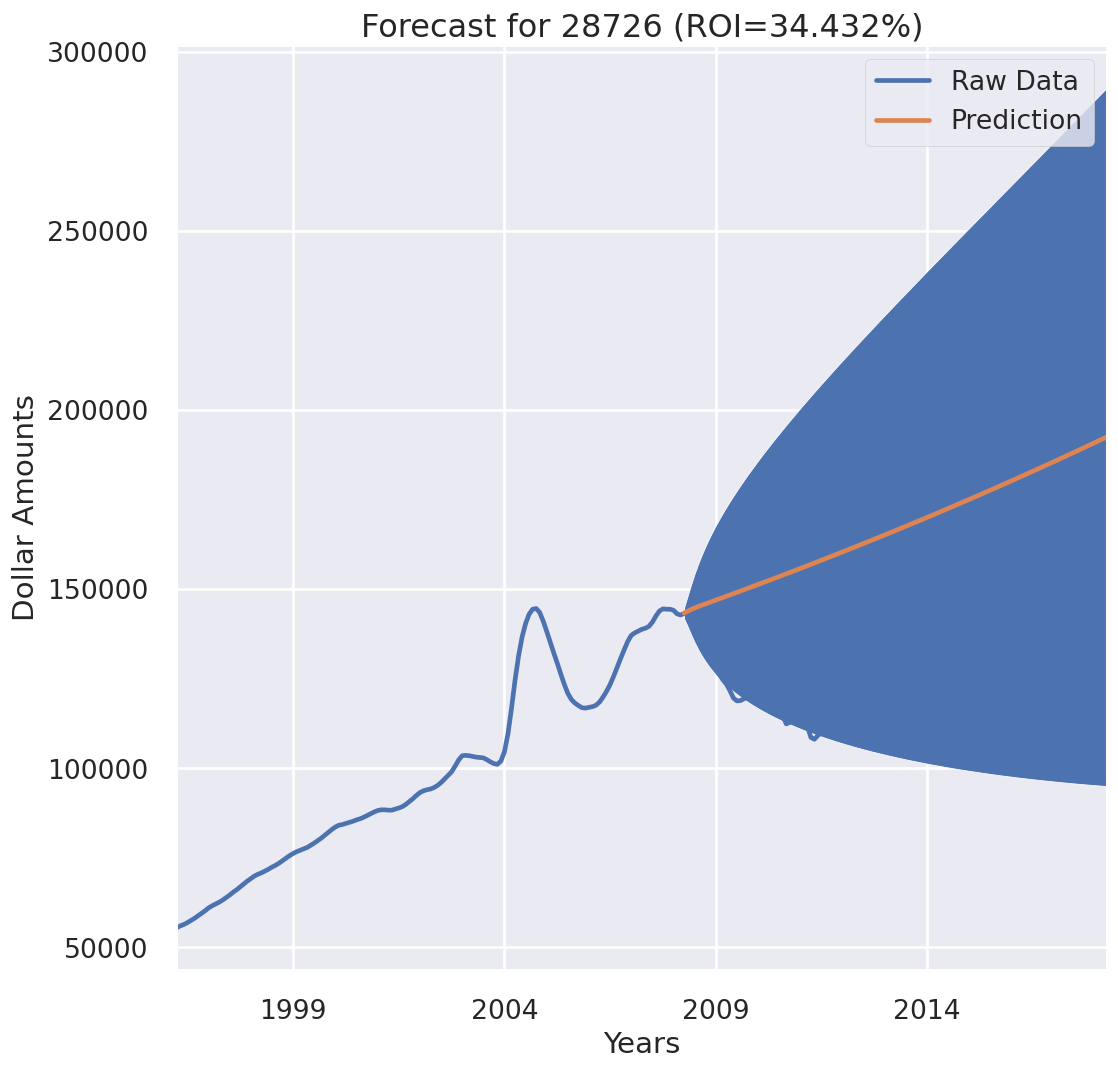

10305


index        pdq          AIC
0      6  (2, 0, 0)  3798.560459
1      7  (2, 0, 1)  3800.151602
2      8  (2, 0, 2)  3804.976156
3      4  (1, 0, 1)  4071.048373
4      5  (1, 0, 2)  4091.771227

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  10305   No. Observations:                  265
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2116.615
Date:                Tue, 20 Jun 2023   AIC                           4239.229
Time:                        19:11:54   BIC                           4249.946
Sample:                    04-01-1996   HQIC                          4243.536
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9558      0.018    109.431      0.000       1.921       1.991
ar.L2         -0.9556      0.018    -53.246      0.000      -0.991      -0.920
sigma2      5.727e+05    4.1e-09    1.4e+14      0.000    5.73e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                  32.88   Jarque-Bera (JB):               102.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              37.12   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+29. Standard errors may be unstable.
"""

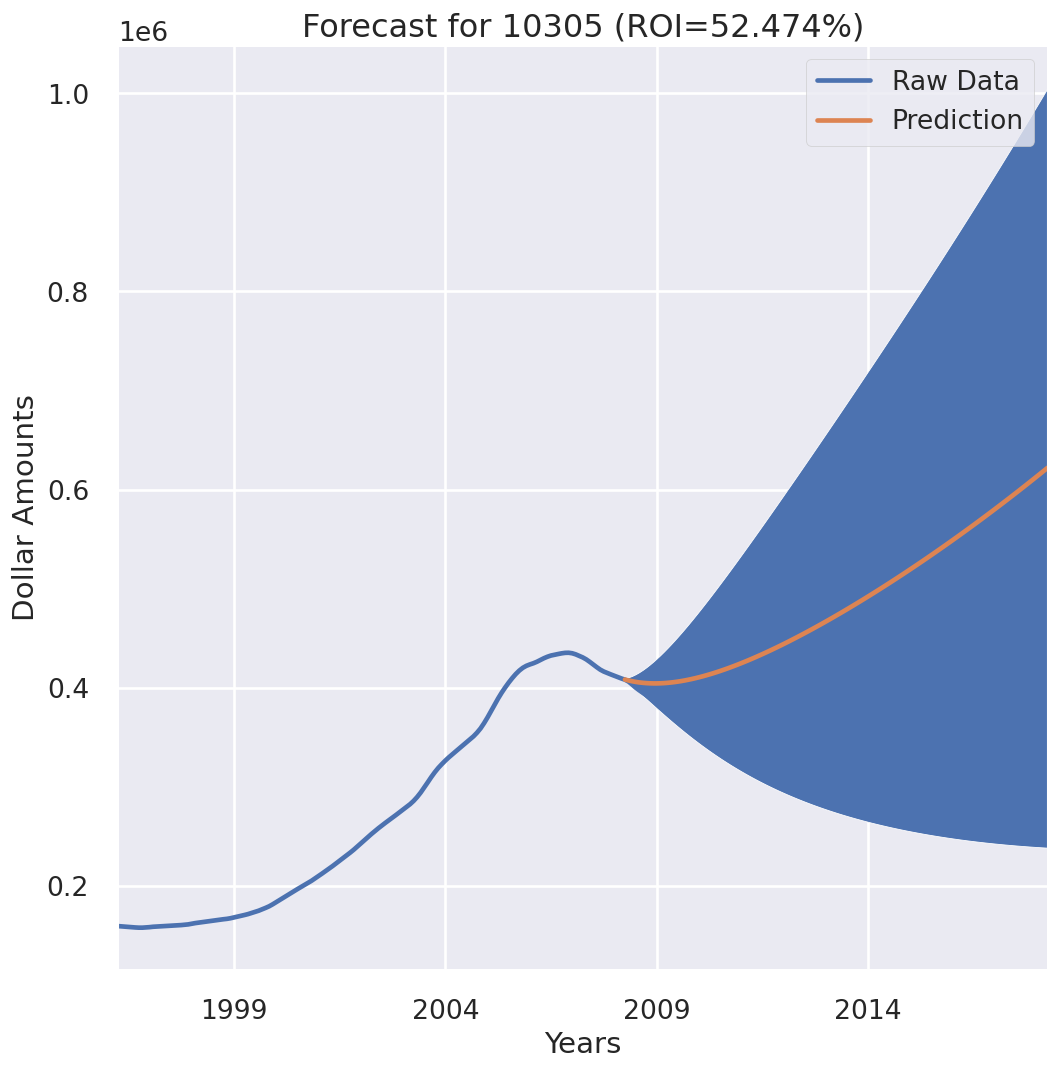

93723


index        pdq          AIC
0      8  (2, 0, 2)  3726.522007
1      6  (2, 0, 0)  3826.713239
2      7  (2, 0, 1)  3830.570542
3      5  (1, 0, 2)  3935.093374
4      4  (1, 0, 1)  4299.004183

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  93723   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2075.195
Date:                Tue, 20 Jun 2023   AIC                           4160.390
Time:                        19:11:58   BIC                           4178.232
Sample:                    04-01-1996   HQIC                          4167.561
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9026      0.028     69.180      0.000       1.849       1.956
ar.L2         -0.9024      0.028    -32.693      0.000      -0.956      -0.848
ma.L1          0.7851      0.045     17.323      0.000       0.696       0.874
ma.L2          0.1457      0.025      5.797      0.000       0.096       0.195
sigma2       4.39e+05   2.68e-08   1.64e+13      0.000    4.39e+05    4.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                55.16
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              11.11   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+28. Standard errors may be unstable.
"""

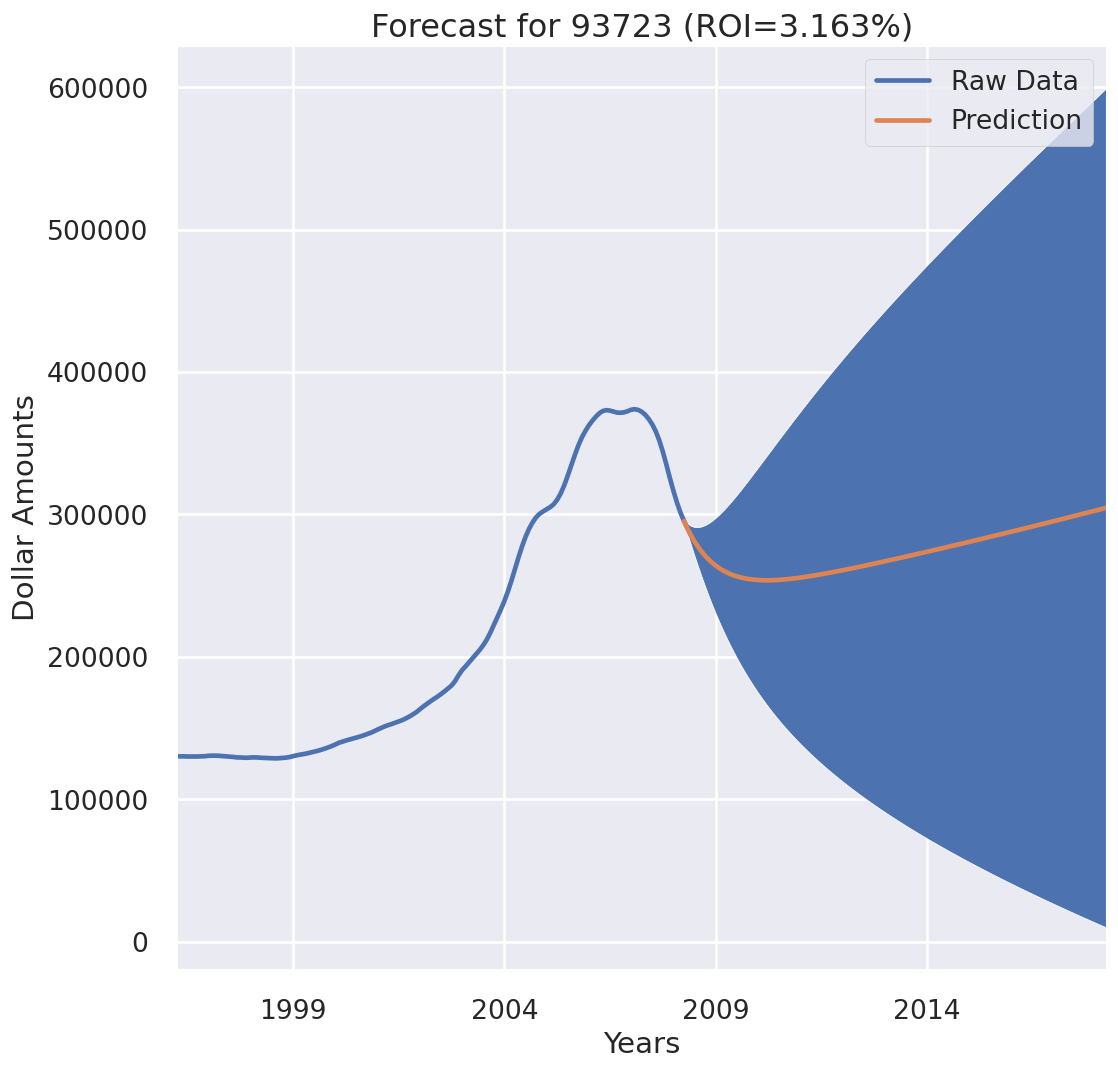

44264


index        pdq          AIC
0      8  (2, 0, 2)  3819.502283
1      5  (1, 0, 2)  3892.929964
2      6  (2, 0, 0)  4002.827748
3      7  (2, 0, 1)  4029.793913
4      4  (1, 0, 1)  4062.842036

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  44264   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2097.340
Date:                Tue, 20 Jun 2023   AIC                           4204.681
Time:                        19:12:00   BIC                           4222.522
Sample:                    04-01-1996   HQIC                          4211.852
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6668      0.040     41.184      0.000       1.588       1.746
ar.L2         -0.6660      0.041    -16.433      0.000      -0.745      -0.587
ma.L1          0.9674      0.044     21.885      0.000       0.881       1.054
ma.L2          0.2761      0.026     10.513      0.000       0.225       0.328
sigma2      5.389e+05   1.47e-08   3.66e+13      0.000    5.39e+05    5.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.58   Jarque-Bera (JB):               776.86
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               5.16   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+29. Standard errors may be unstable.
"""

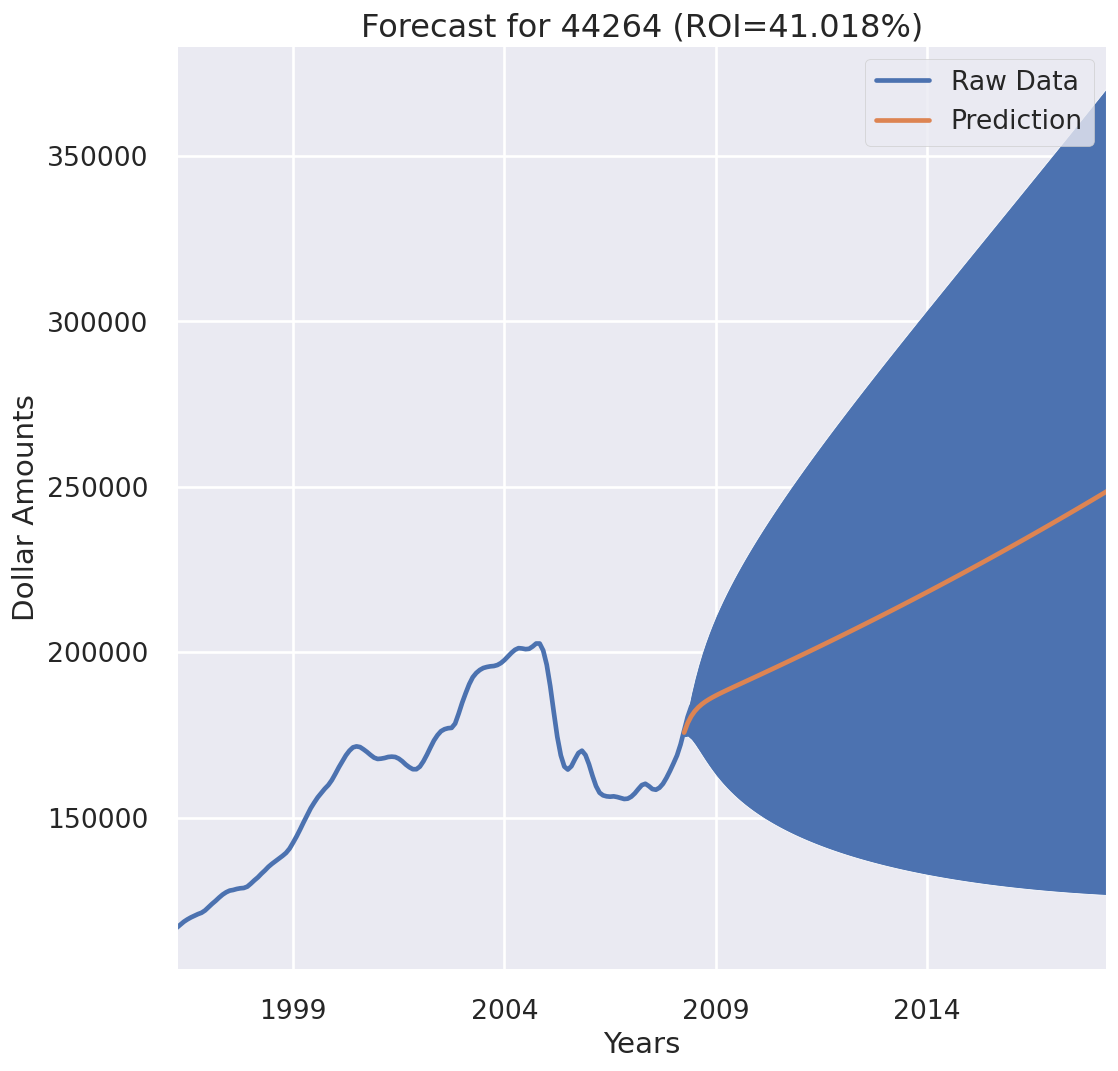

28658


index        pdq          AIC
0      8  (2, 0, 2)  3288.690822
1      7  (2, 0, 1)  3320.277616
2      6  (2, 0, 0)  3327.862729
3      5  (1, 0, 2)  3374.031279
4      4  (1, 0, 1)  3506.516287

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  28658   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1824.011
Date:                Tue, 20 Jun 2023   AIC                           3658.023
Time:                        19:12:02   BIC                           3675.864
Sample:                    04-01-1996   HQIC                          3665.194
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7401      0.049     35.732      0.000       1.645       1.835
ar.L2         -0.7396      0.049    -15.156      0.000      -0.835      -0.644
ma.L1          0.5013      0.060      8.388      0.000       0.384       0.618
ma.L2          0.0320      0.056      0.571      0.568      -0.078       0.142
sigma2      6.501e+04   3913.624     16.612      0.000    5.73e+04    7.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               112.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               8.12   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

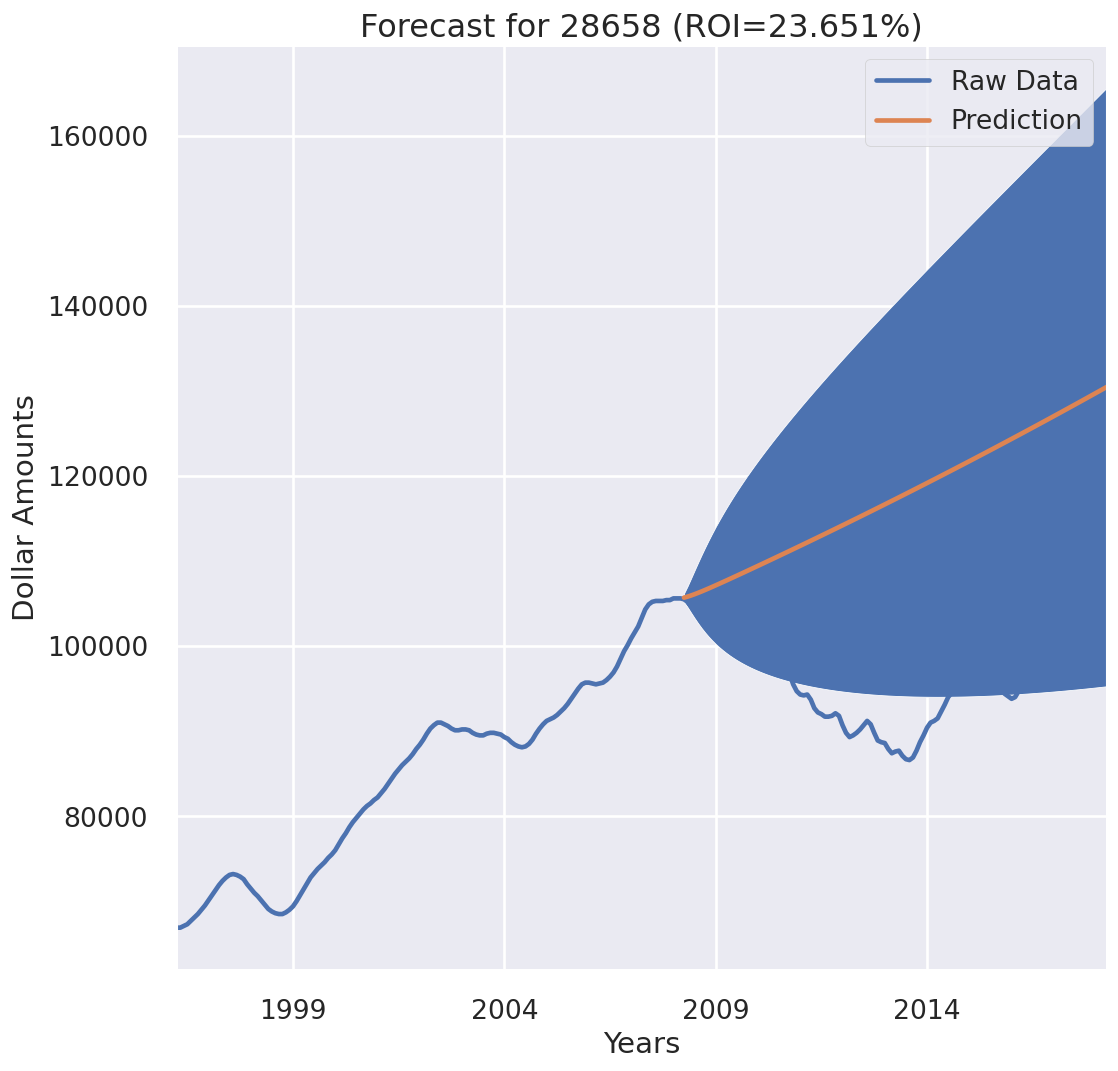

11792


index        pdq          AIC
0      8  (2, 0, 2)  3892.167657
1      6  (2, 0, 0)  3959.475434
2      7  (2, 0, 1)  3961.770277
3      5  (1, 0, 2)  4227.110210
4      4  (1, 0, 1)  4300.330737

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  11792   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2167.835
Date:                Tue, 20 Jun 2023   AIC                           4345.669
Time:                        19:12:05   BIC                           4363.511
Sample:                    04-01-1996   HQIC                          4352.840
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8187      0.034     54.180      0.000       1.753       1.884
ar.L2         -0.8184      0.034    -24.337      0.000      -0.884      -0.752
ma.L1          0.6798      0.034     20.200      0.000       0.614       0.746
ma.L2          0.1547      0.018      8.510      0.000       0.119       0.190
sigma2      7.844e+05    3.2e-08   2.45e+13      0.000    7.84e+05    7.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                64.95
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               9.57   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+28. Standard errors may be unstable.
"""

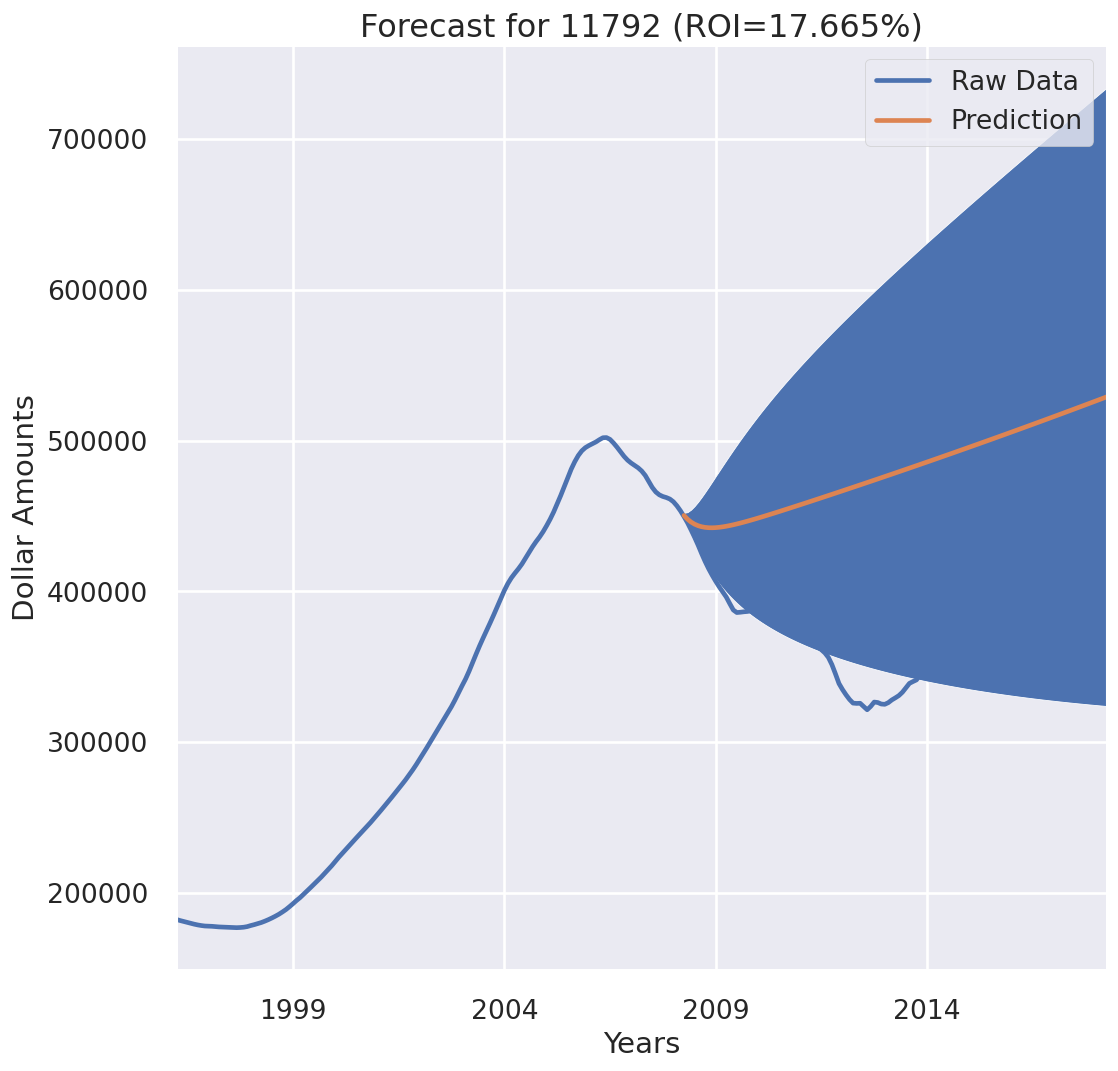

3766


index        pdq          AIC
0      8  (2, 0, 2)  3635.363255
1      6  (2, 0, 0)  3771.607051
2      7  (2, 0, 1)  3772.343126
3      5  (1, 0, 2)  3823.678274
4      4  (1, 0, 1)  3951.329710

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   3766   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2017.363
Date:                Tue, 20 Jun 2023   AIC                           4044.725
Time:                        19:12:08   BIC                           4062.567
Sample:                    04-01-1996   HQIC                          4051.896
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7555      0.040     43.761      0.000       1.677       1.834
ar.L2         -0.7550      0.040    -18.788      0.000      -0.834      -0.676
ma.L1          0.8181      0.050     16.402      0.000       0.720       0.916
ma.L2          0.1753      0.028      6.301      0.000       0.121       0.230
sigma2      2.923e+05   7.71e-08   3.79e+12      0.000    2.92e+05    2.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.73   Jarque-Bera (JB):                23.76
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               8.59   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.89e+27. Standard errors may be unstable.
"""

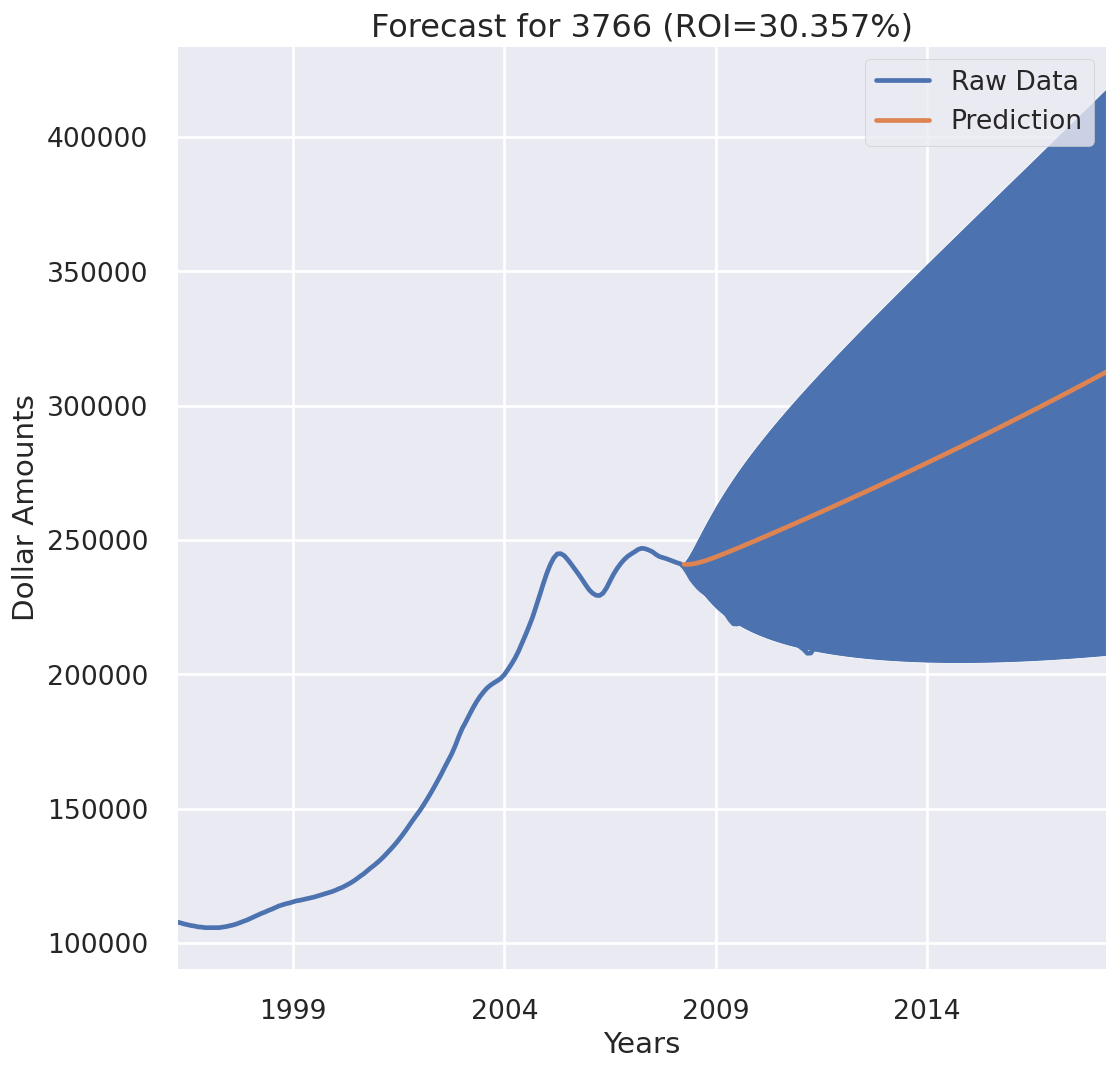

38654


index        pdq          AIC
0      5  (1, 0, 2)  3484.781459
1      8  (2, 0, 2)  3505.414255
2      6  (2, 0, 0)  3586.136216
3      7  (2, 0, 1)  3586.504944
4      4  (1, 0, 1)  3675.988538

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  38654   No. Observations:                  265
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2010.103
Date:                Tue, 20 Jun 2023   AIC                           4028.206
Time:                        19:12:11   BIC                           4042.480
Sample:                    04-01-1996   HQIC                          4033.943
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0015      0.001   1105.583      0.000       1.000       1.003
ma.L1          1.4344      0.039     37.187      0.000       1.359       1.510
ma.L2          0.7751      0.042     18.389      0.000       0.692       0.858
sigma2      3.685e+05   2.57e+04     14.323      0.000    3.18e+05    4.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):               363.52
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              20.76   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

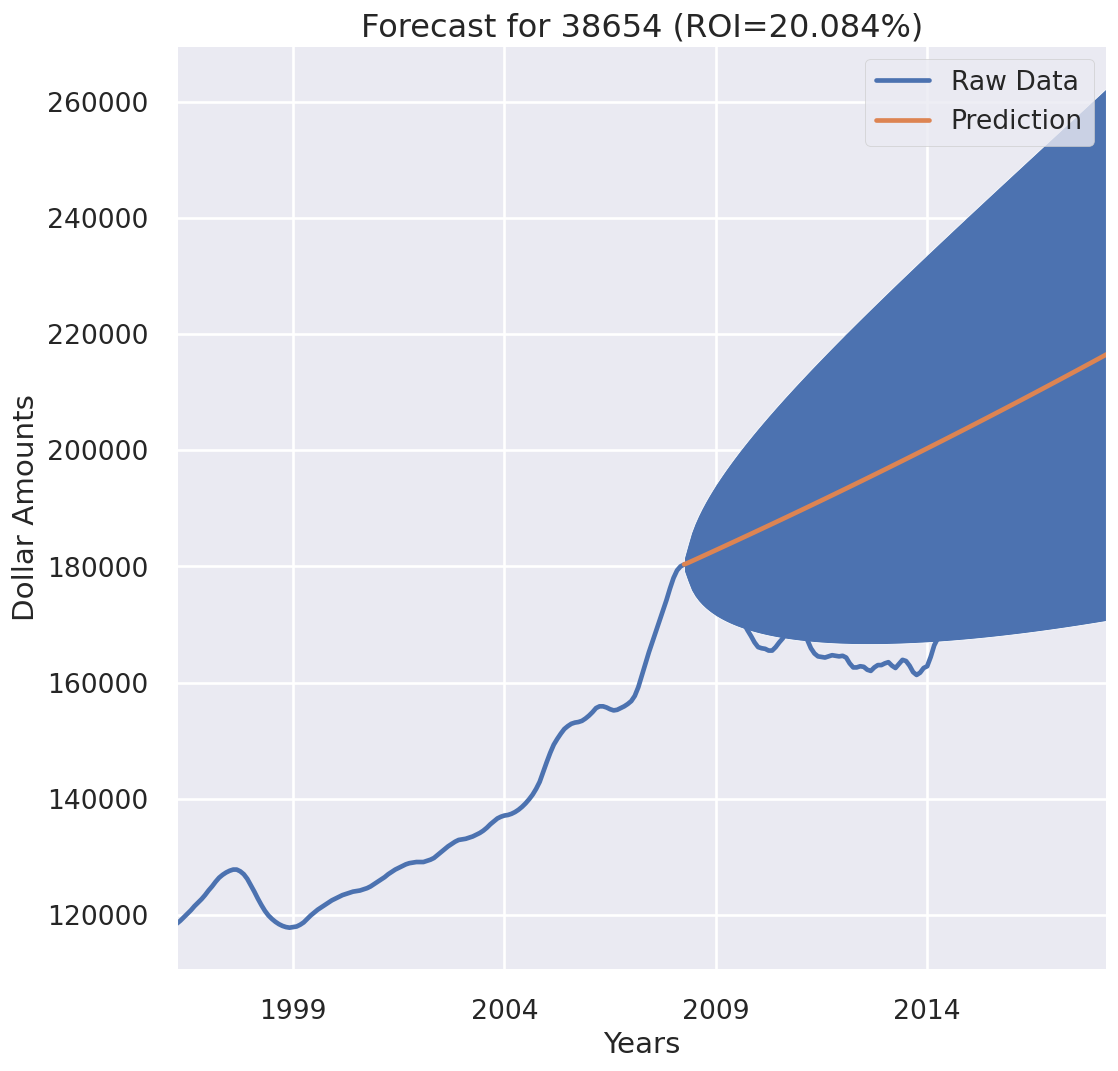

60406


index        pdq          AIC
0      8  (2, 0, 2)  3496.614171
1      7  (2, 0, 1)  3561.403253
2      6  (2, 0, 0)  3567.371465
3      5  (1, 0, 2)  3598.352400
4      4  (1, 0, 1)  3859.720958

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  60406   No. Observations:                  265
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1934.534
Date:                Tue, 20 Jun 2023   AIC                           3879.069
Time:                        19:12:14   BIC                           3896.911
Sample:                    04-01-1996   HQIC                          3886.240
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8506      0.034     54.705      0.000       1.784       1.917
ar.L2         -0.8507      0.034    -25.231      0.000      -0.917      -0.785
ma.L1          0.5923      0.056     10.535      0.000       0.482       0.702
ma.L2          0.0478      0.050      0.957      0.339      -0.050       0.146
sigma2      1.492e+05   5.14e-08    2.9e+12      0.000    1.49e+05    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                83.47
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              17.24   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.13e+28. Standard errors may be unstable.
"""

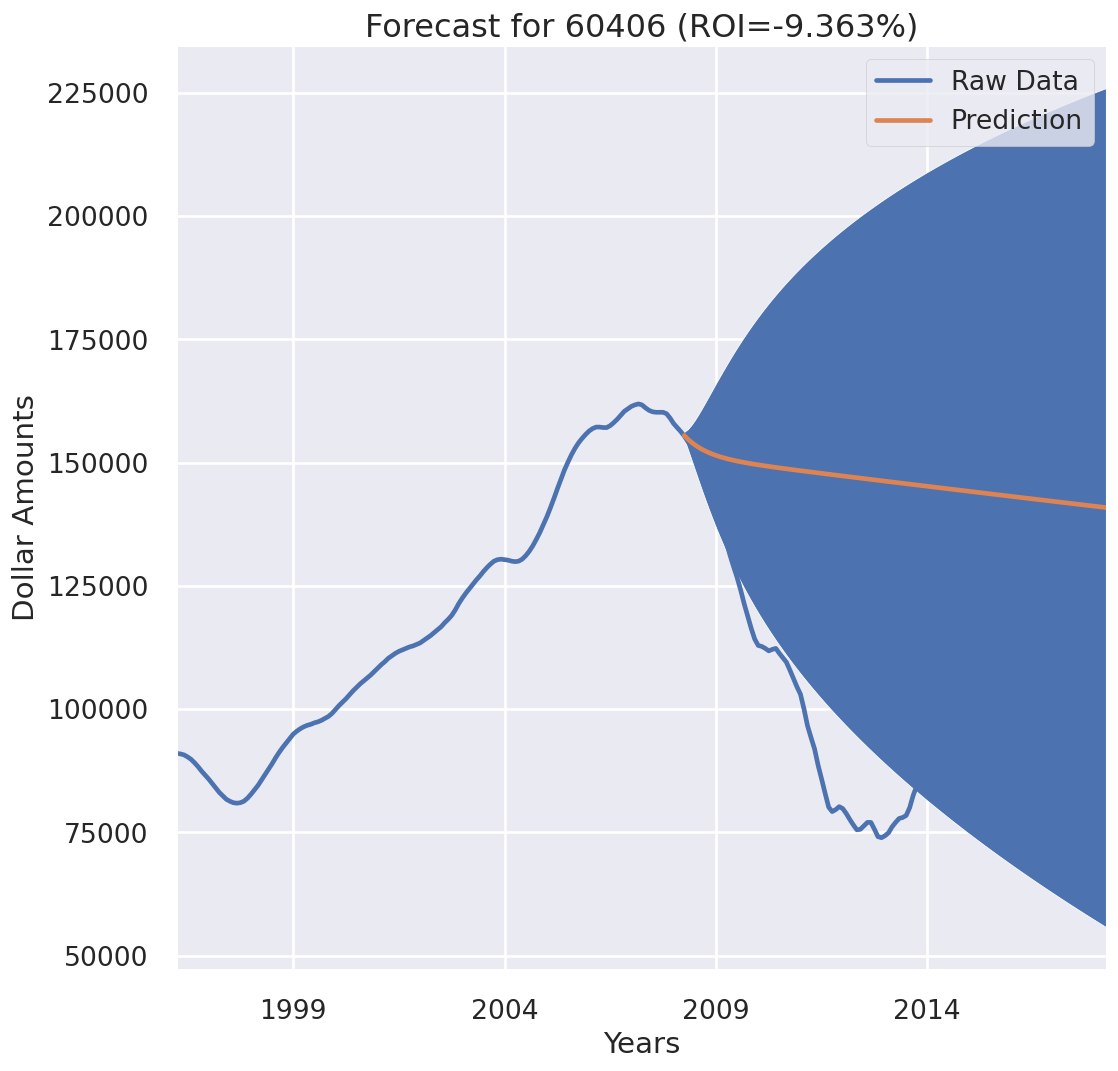

Zip Code     ROI
2     10305  52.474
4     44264  41.018
1     28726  34.432
7      3766  30.357
5     28658  23.651
8     38654  20.084
6     11792  17.665
0      6483   6.371
3     93723   3.163
9     60406  -9.363

<Figure size 1200x1200 with 0 Axes>

In [213]:
from sklearn.metrics import mean_squared_error,r2_score

result = [['Zip Code', 'ROI']]
result_fig = {}

for z in zip_code:

    print(z)
    ts = get_ts(df, z)

    # params
    best_params, ts_train, ts_test = best_params1(ts, p=3, d=1, q=3,
                                                       start_date='2016-04-01')
    # model and fit
    output = models(ts, best_params)
    # Graph
    ts_pred, e_roi, fig = forecast_out(ts, output=output)

    result.append([z, e_roi])
    result_fig[z] = fig

forecast_df = pd.DataFrame(result[1:], columns = result[0])
forecast_df.sort_values('ROI', ascending=False, inplace=True)


forecast_df

In [223]:
# Top 5 zip codes
Top_5 = forecast_df [:5]

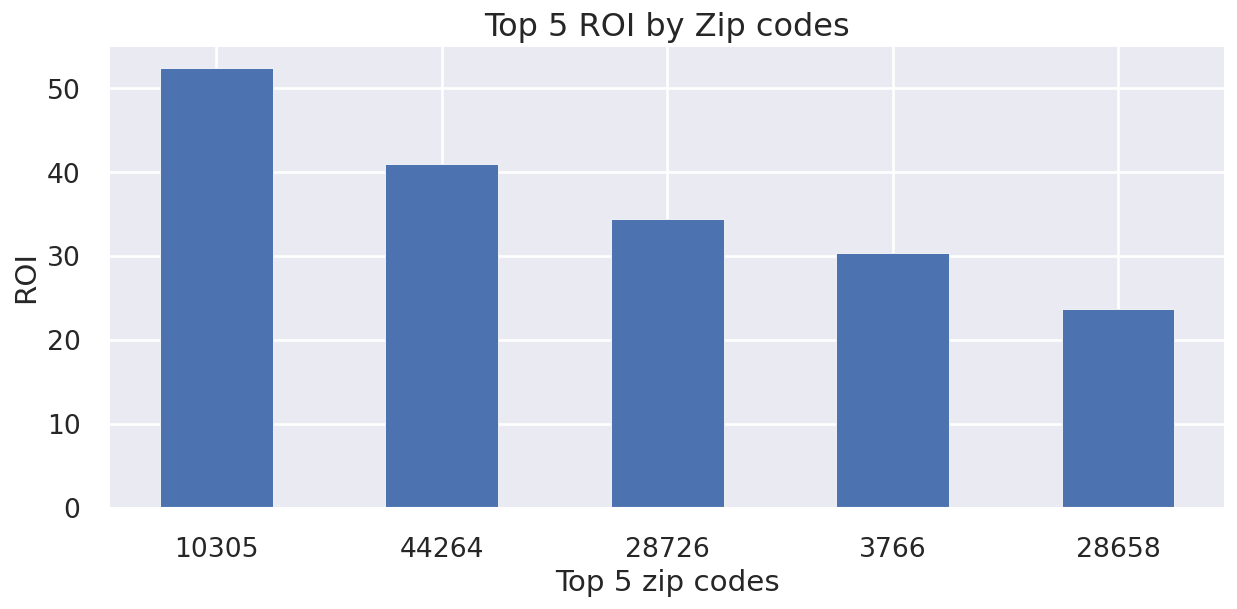

In [235]:
x = [str(code) for code in Top_5['Zip Code']]
y = list(Top_5['ROI'])
plt.figure(figsize = (12,5))
plt.bar(x,y,width = 0.5)
plt.xlabel("Top 5 zip codes")
plt.ylabel("ROI")
plt.title("Top 5 ROI by Zip codes")
plt.show();

### **Top zip codes**

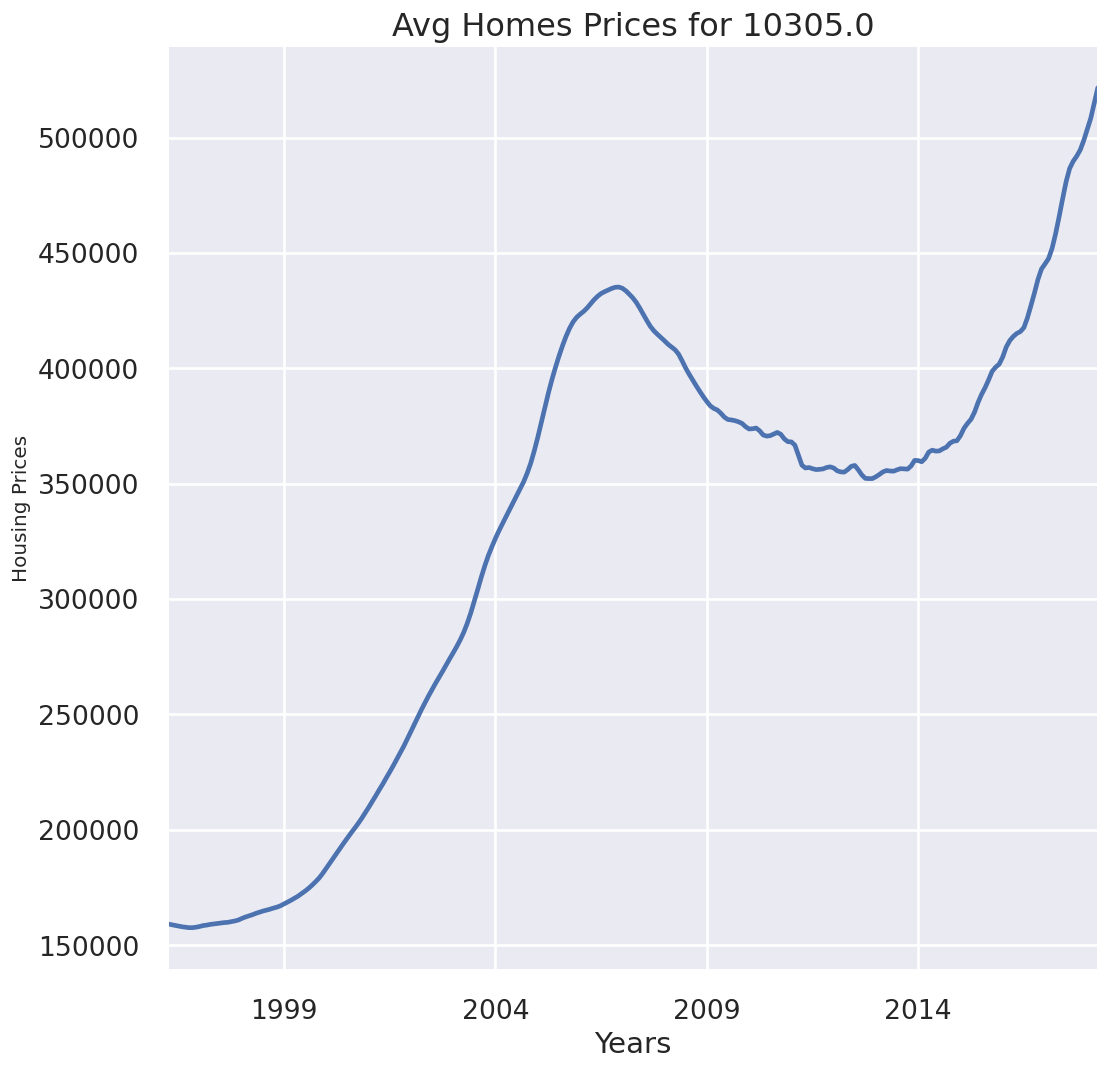

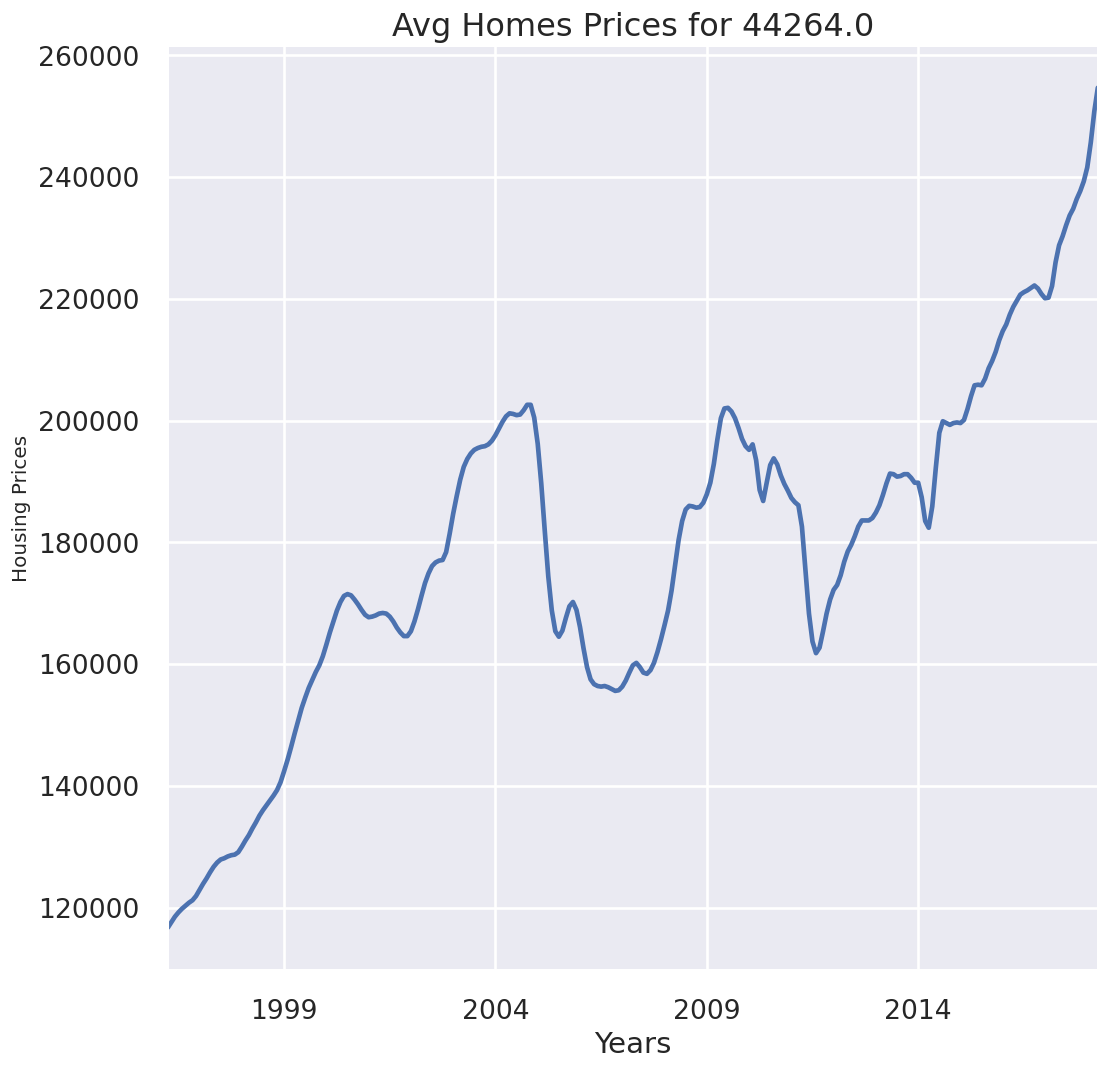

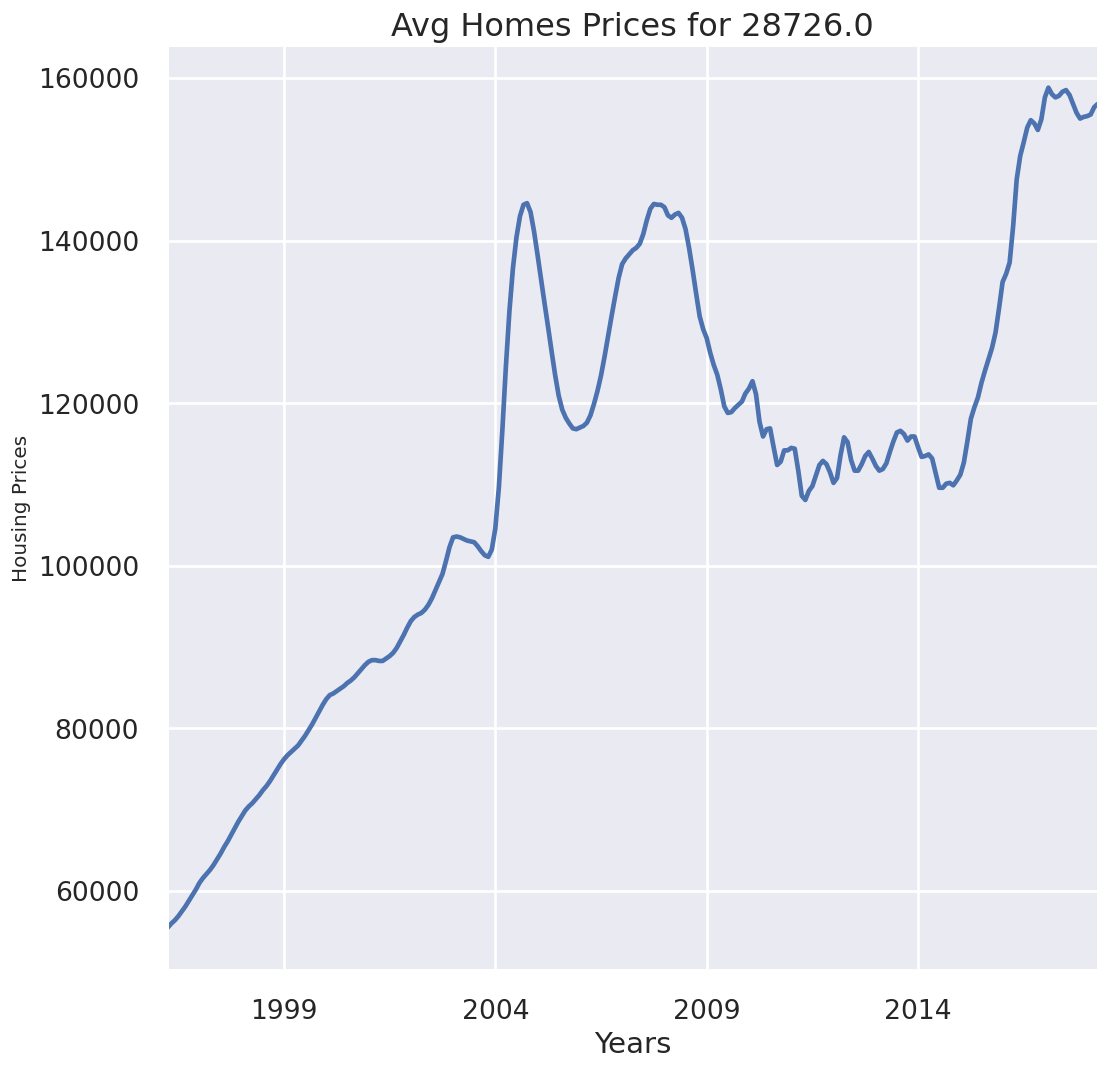

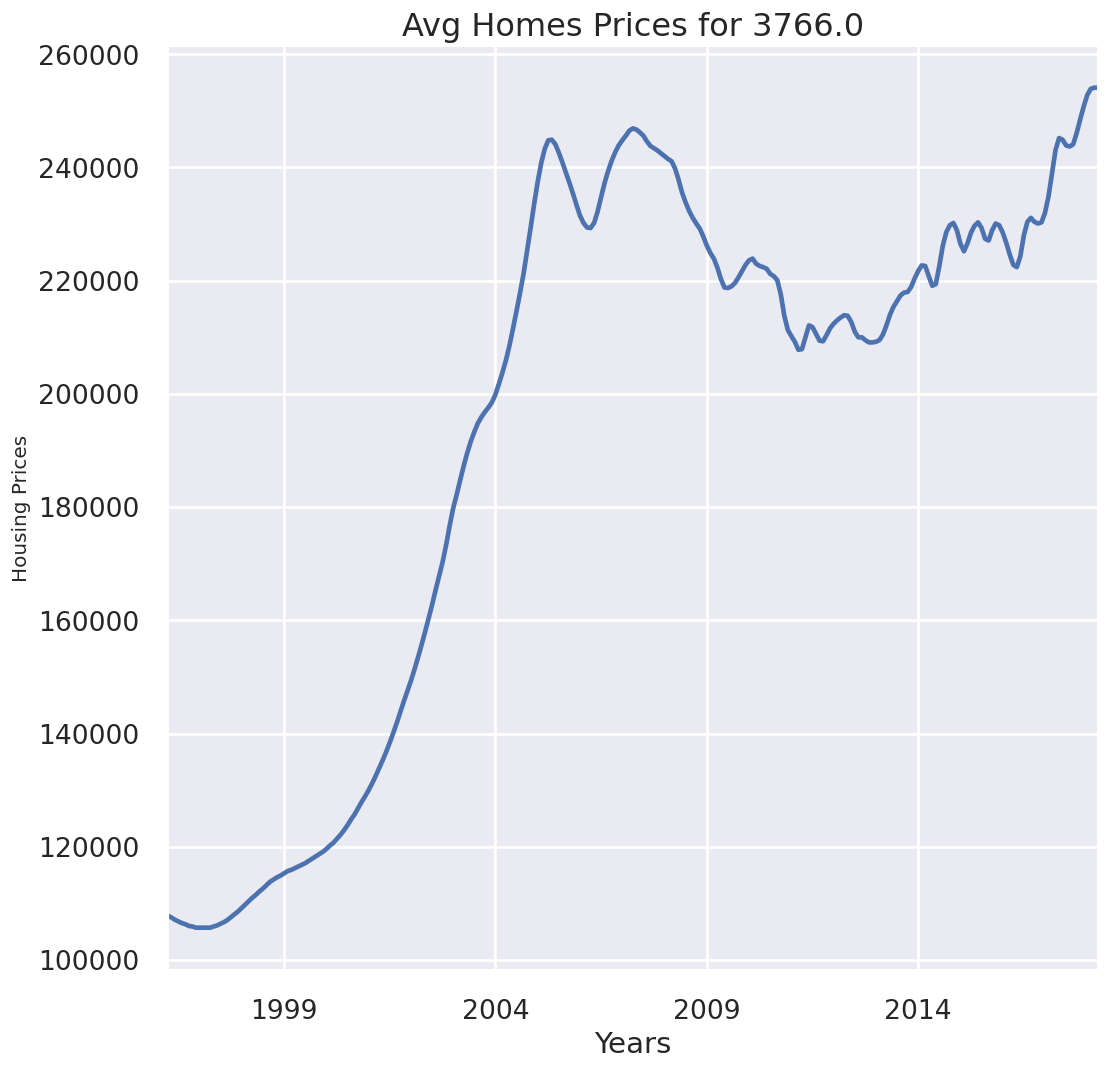

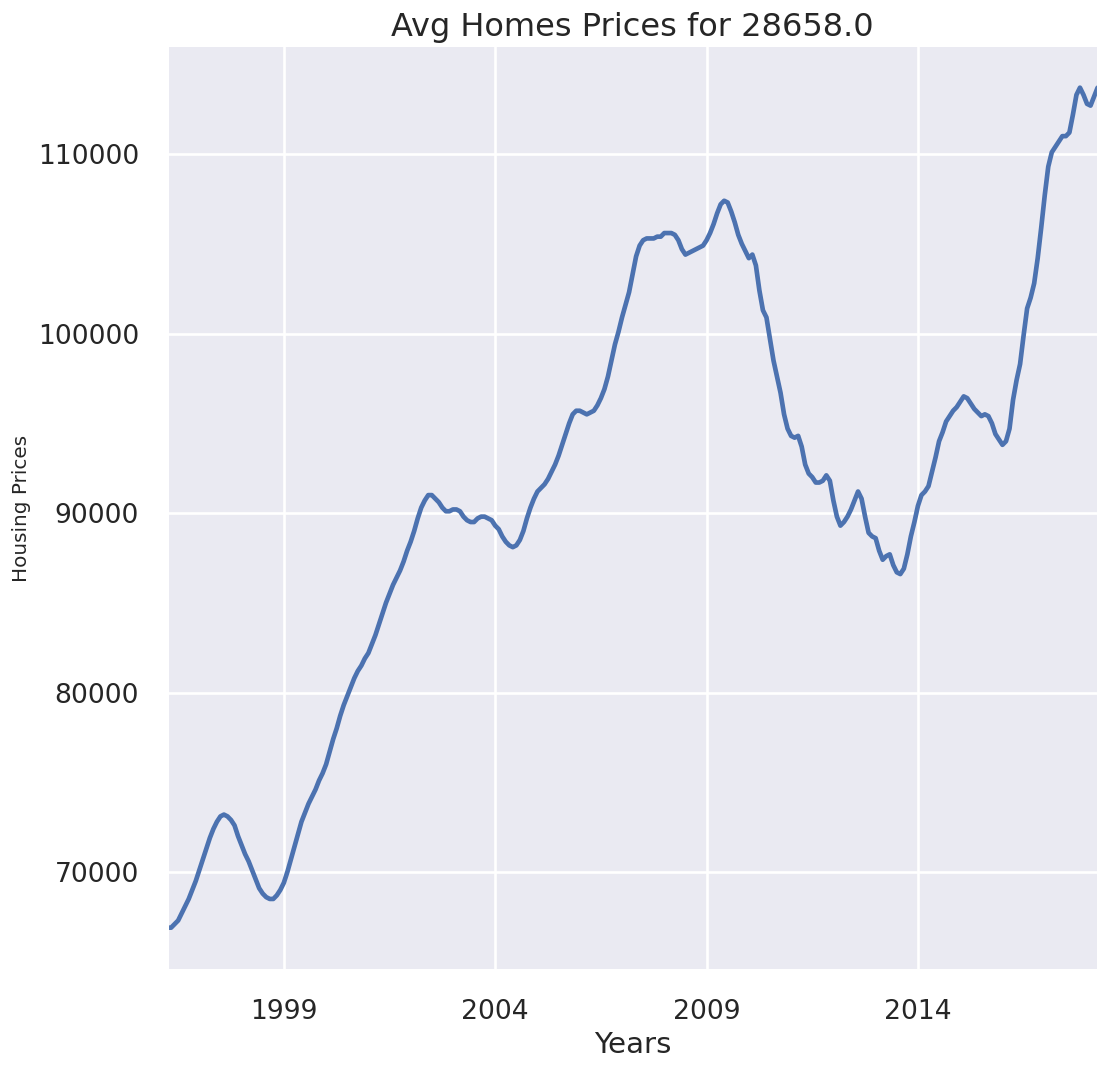

In [229]:
for i, row in Top_5.iterrows():
    zip_code = row['Zip Code']
    top_zip_df = get_ts(df, zip_code)

    top_zip_df.plot()
    plt.title(f'Avg Homes Prices for {zip_code}')
    plt.ylabel('Housing Prices', fontsize=12)
    plt.xlabel('Years')
    plt.show()